Mounted at /content/drive


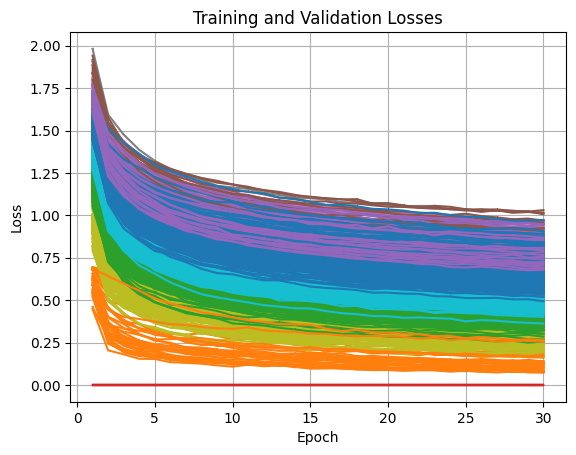

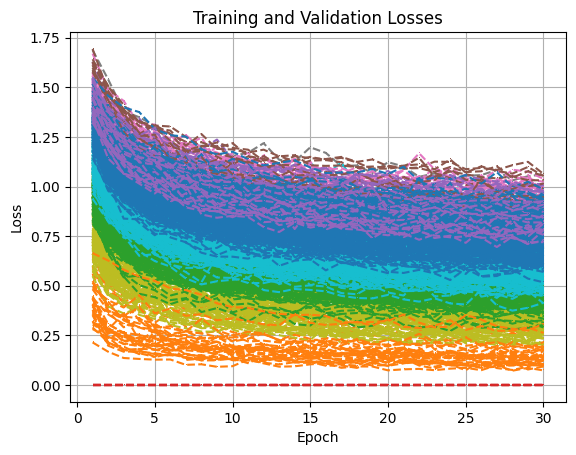

In [ ]:
#Displays training and validation data color-coded by num_classes. Parts generated by ChatGPT

import os
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the folder containing the saved Excel files
folder_path = "/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/"

# Read all Excel files and store the data in a dictionary
data_dict = {}
for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_excel(file_path)
        num_classes = file.count('_')   # Count the number of '_' in the filename to determine the number of classes
        data_dict[file] = {'data': df, 'num_classes': num_classes}

# Plot the data from different Excel files
markers = [',']
colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:brown', 'tab:gray']
cifar_class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
cifar_class_types = [1,1,-1,-1,-1,-1,-1,-1,1,1]

for i, (filename, file_data) in enumerate(data_dict.items()):
    df = file_data['data']
    num_classes = file_data['num_classes']

    label = f"{num_classes} classes ({filename})"
    plt.plot(df['Epoch'], df['Training Loss'], linestyle='-', marker=markers[0], color=colors[num_classes - 1], label=label)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
#plt.legend()
plt.grid()
plt.show()

for i, (filename, file_data) in enumerate(data_dict.items()):
    df = file_data['data']
    num_classes = file_data['num_classes']

    label = f"{num_classes} classes ({filename})"
    plt.plot(df['Epoch'], df['Validation Loss'], linestyle='--', marker=markers[0], color=colors[num_classes - 1 ])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
#plt.legend()
plt.grid()
plt.show()

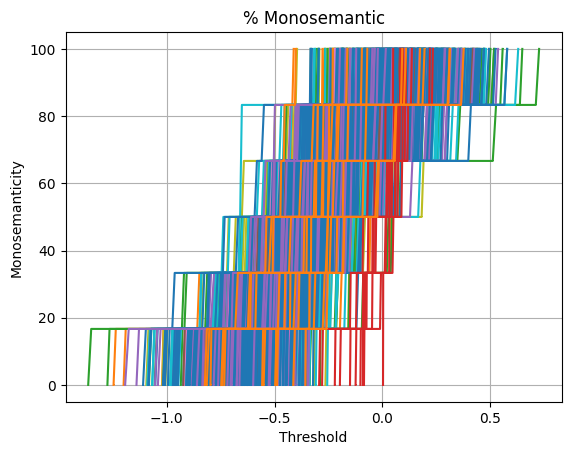

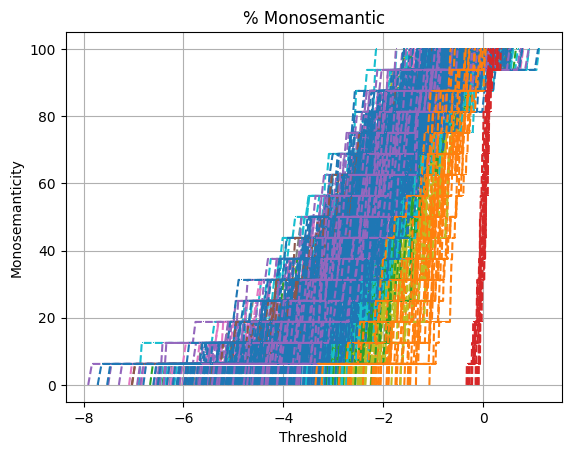

In [ ]:
#Displays conv1 and conv2 monosemanticity data colored by num_classes. Parts generated by ChatGPT

data_dict = {}
for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df_m = pd.read_excel(file_path, sheet_name=1)
        num_classes = file.count('_')  # Count the number of '_' in the filename to determine the number of classes
        data_dict[file] = {'data': df_m, 'num_classes': num_classes}

for i, (filename, file_data) in enumerate(data_dict.items()):
    df_m = file_data['data']
    num_classes = file_data['num_classes']

    label = f"{num_classes} classes ({filename})"
    plt.plot(df_m['Conv1 Threshold'], df_m['Conv1 % Monosemantic Neurons'], linestyle='-', marker=markers[0], color=colors[num_classes - 1], label=label)

plt.xlabel('Threshold')
plt.ylabel('Monosemanticity')
plt.title('% Monosemantic')
#plt.legend()
plt.grid()
plt.show()

data_dict = {}
for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df_m = pd.read_excel(file_path, sheet_name=1)
        num_classes = file.count('_')   # Count the number of '_' in the filename to determine the number of classes
        data_dict[file] = {'data': df_m, 'num_classes': num_classes}

for i, (filename, file_data) in enumerate(data_dict.items()):
    df_m = file_data['data']
    num_classes = file_data['num_classes']

    label = f"{num_classes} classes ({filename})"
    plt.plot(df_m['Conv2 Threshold'], df_m['Conv2 % Monosemantic Neurons'], linestyle='--', marker=markers[0], color=colors[num_classes - 1])

plt.xlabel('Threshold')
plt.ylabel('Monosemanticity')
plt.title('% Monosemantic')
#plt.legend()
plt.grid()
plt.show()

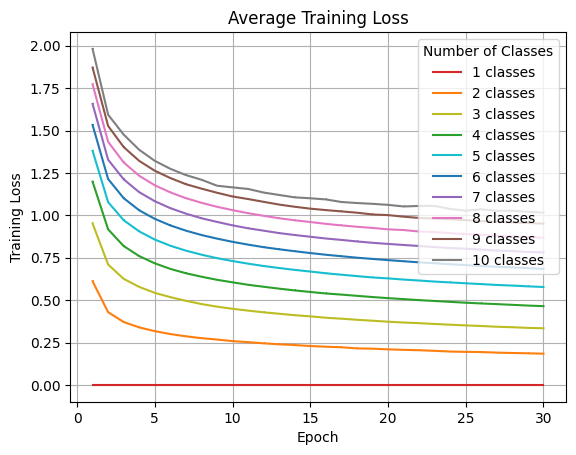

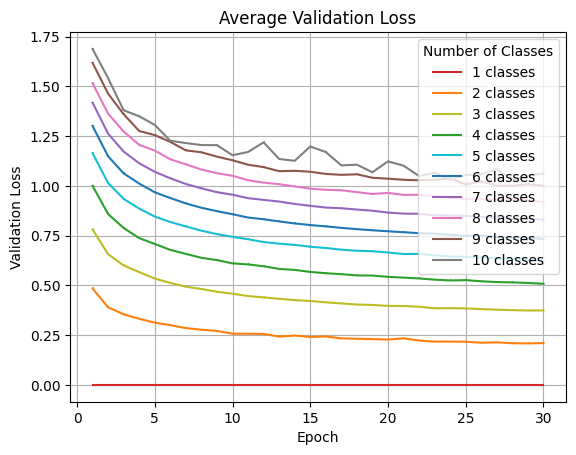

In [ ]:
#Displays the average of the training and validation data. Generated with ChatGPT

import numpy as np
from collections import defaultdict

data_dict = defaultdict(list)

# Gather the data
for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_excel(file_path, sheet_name=0)
        num_classes = file.count('_')
        data_dict[num_classes].append(df)

# Calculate and plot the average for training loss
for num_classes, dfs in sorted(data_dict.items()):
    avg_train_loss = []
    for df in dfs:
        avg_train_loss.append(df['Training Loss'])
    
    mean_train_loss = np.mean(avg_train_loss, axis=0)
    
    label = f"{num_classes} classes"
    plt.plot(df['Epoch'], mean_train_loss, linestyle='-', marker=markers[0], color=colors[num_classes - 1], label=label)

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Average Training Loss')
plt.legend(title="Number of Classes")
plt.grid()
plt.show()

# Calculate and plot the average for validation loss
for num_classes, dfs in sorted(data_dict.items()):
    avg_val_loss = []
    for df in dfs:
        avg_val_loss.append(df['Validation Loss'])
    
    mean_val_loss = np.mean(avg_val_loss, axis=0)
    
    label = f"{num_classes} classes"
    plt.plot(df['Epoch'], mean_val_loss, linestyle='-', marker=markers[0], color=colors[num_classes - 1], label=label)

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Average Validation Loss')
plt.legend(title="Number of Classes")
plt.grid()
plt.show()


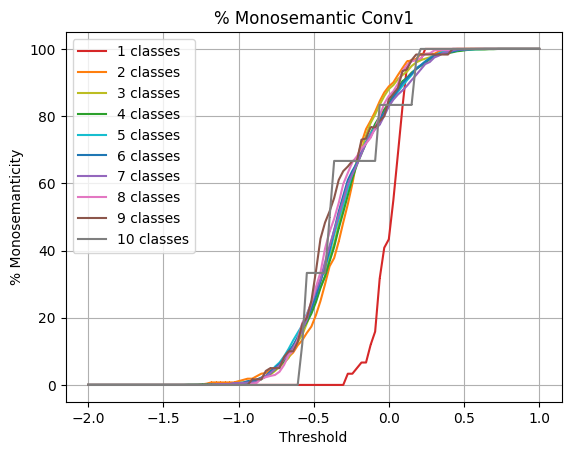

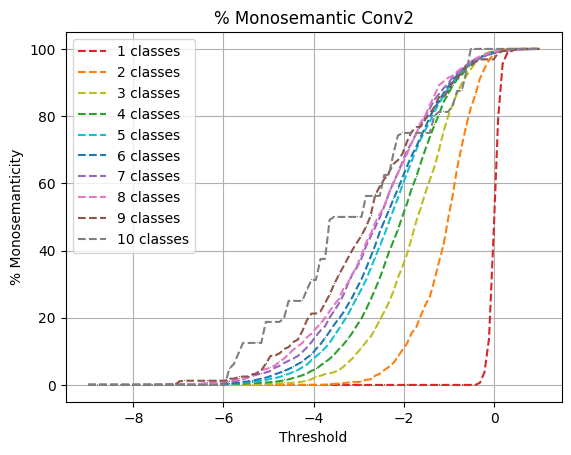

In [ ]:
#Displays average of monosemanticity graphs (interpolated) over monosemanticity threshold. Structure built with ChatGPT

import numpy as np

data_dict = defaultdict(list)
conv1_thresholds = np.linspace(-2, 1, 100)
conv2_thresholds = np.linspace(-9, 1, 100)

# Gather the data
for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df_m = pd.read_excel(file_path, sheet_name=1)
        num_classes = file.count('_')
        data_dict[num_classes].append(df_m)

# Calculate and plot the average for Conv1
for num_classes, dfs in sorted(data_dict.items()):
    interpolated_values = []
    for df in dfs:
        interpolated = np.interp(conv1_thresholds, df['Conv1 Threshold'], df['Conv1 % Monosemantic Neurons'])
        interpolated_values.append(interpolated)
    mean_values = np.mean(interpolated_values, axis=0)
    label = f"{num_classes} classes"
    plt.plot(conv1_thresholds, mean_values, linestyle='-', marker=markers[0], color=colors[num_classes - 1], label=label)

plt.xlabel('Threshold')
plt.ylabel('% Monosemanticity')
plt.title('% Monosemantic Conv1')
plt.legend()
plt.grid()
plt.show()

# Calculate and plot the average for Conv2
for num_classes, dfs in sorted(data_dict.items()):
    interpolated_values = []
    for df in dfs:
        interpolated = np.interp(conv2_thresholds, df['Conv2 Threshold'], df['Conv2 % Monosemantic Neurons'])
        interpolated_values.append(interpolated)
    mean_values = np.mean(interpolated_values, axis=0)
    label = f"{num_classes} classes"
    plt.plot(conv2_thresholds, mean_values, linestyle='--', marker=markers[0], color=colors[num_classes - 1], label=label)

plt.xlabel('Threshold')
plt.ylabel('% Monosemanticity')
plt.title('% Monosemantic Conv2')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Reads and prints all docs in the google drive. Used for a santity check on file naming structure

import os
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the folder containing the saved Excel files
folder_path = "/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/"

# Read all Excel files and store the data in a dictionary
data_dict = {}
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    print(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/results_automobile_frog.xlsx
/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/results_automobile_horse.xlsx
/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/results_automobile_ship.xlsx
/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/results_automobile_truck.xlsx
/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/results_bird_cat.xlsx
/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/results_bird_deer.xlsx
/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/results_bird_dog.xlsx
/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/results_bird_frog.xlsx
/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/results_bird_horse.xlsx
/content/

<ipython-input-18-a691cae5b118>:58: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Average Accuracy')


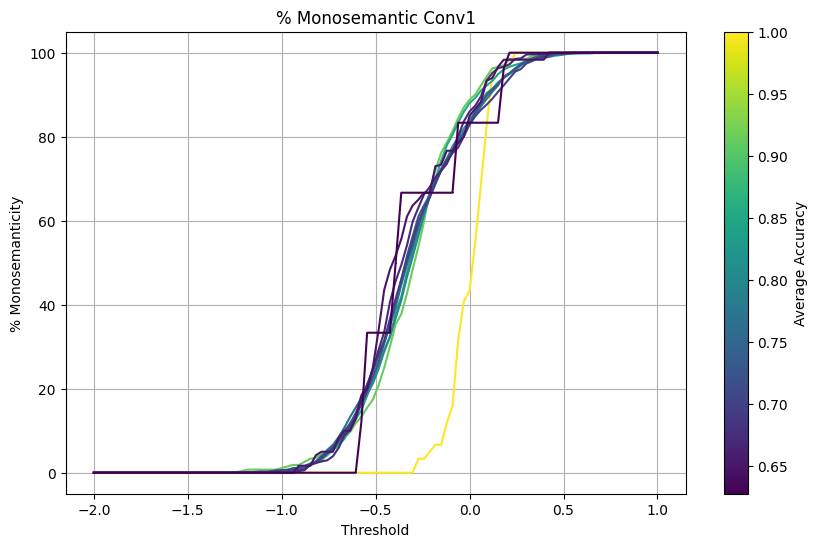

<ipython-input-18-a691cae5b118>:80: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Average Accuracy')


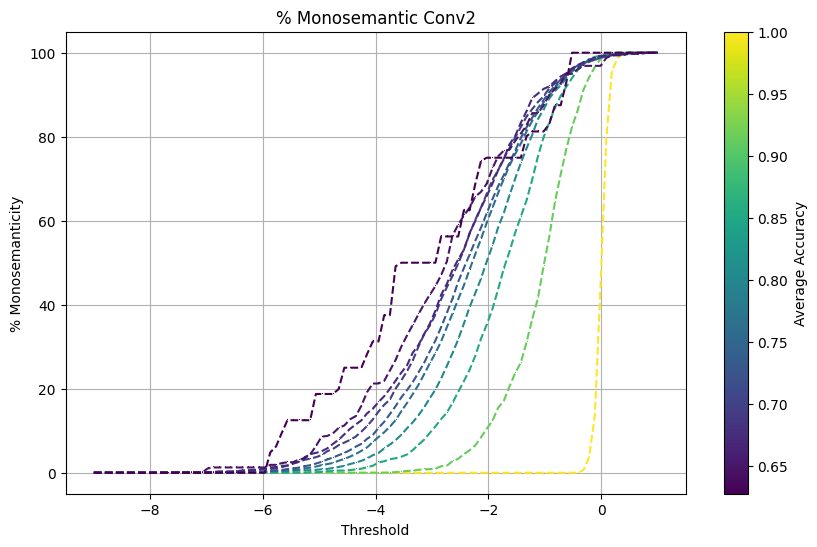

In [ ]:
#Displays average conv1 and conv2 monosemanticity data for each num_classes and color codes them by accuracy

import numpy as np
from collections import defaultdict
import matplotlib as mpl

data_dict = defaultdict(list)
accuracy_dict = defaultdict(list)
conv1_thresholds = np.linspace(-2, 1, 100)
conv2_thresholds = np.linspace(-9, 1, 100)

# Gather the data
for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df_m = pd.read_excel(file_path, sheet_name=1)
        df_accuracy = pd.read_excel(file_path, sheet_name="Accuracy")
        num_classes = file.count('_')
        data_dict[num_classes].append(df_m)
        accuracy_dict[num_classes].append(df_accuracy["Accuracy"].mean())

# Calculate average accuracy for each num_class
average_accuracy = {num_classes: np.mean(accuracies) for num_classes, accuracies in accuracy_dict.items()}

# Function to map average accuracy to color
def accuracy_to_color(accuracy, min_accuracy, max_accuracy):
    normalized_accuracy = (accuracy - min_accuracy) / (max_accuracy - min_accuracy)
    return plt.cm.viridis(normalized_accuracy)

min_accuracy = min(average_accuracy.values())
max_accuracy = max(average_accuracy.values())

# Create a scalar mappable object for the colormap
norm = mpl.colors.Normalize(vmin=min_accuracy, vmax=max_accuracy)
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])

# Calculate and plot the average for Conv1
plt.figure(figsize=(10, 6))
for num_classes, dfs in sorted(data_dict.items()):
    interpolated_values = []
    for df in dfs:
        interpolated = np.interp(conv1_thresholds, df['Conv1 Threshold'], df['Conv1 % Monosemantic Neurons'])
        interpolated_values.append(interpolated)
    mean_values = np.mean(interpolated_values, axis=0)
    label = f"{num_classes} classes"
    color = accuracy_to_color(average_accuracy[num_classes], min_accuracy, max_accuracy)
    plt.plot(conv1_thresholds, mean_values, linestyle='-', marker=markers[0], color=color, label=label)

plt.xlabel('Threshold')
plt.ylabel('% Monosemanticity')
plt.title('% Monosemantic Conv1')
#plt.legend()
plt.grid()

# Add a colorbar
plt.colorbar(sm, label='Average Accuracy')
plt.show()

# Calculate and plot the average for Conv2
plt.figure(figsize=(10, 6))
for num_classes, dfs in sorted(data_dict.items()):
    interpolated_values = []
    for df in dfs:
        interpolated = np.interp(conv2_thresholds, df['Conv2 Threshold'], df['Conv2 % Monosemantic Neurons'])
        interpolated_values.append(interpolated)
    mean_values = np.mean(interpolated_values, axis=0)
    label = f"{num_classes} classes"
    color = accuracy_to_color(average_accuracy[num_classes], min_accuracy, max_accuracy)
    plt.plot(conv2_thresholds, mean_values, linestyle='--', marker=markers[0], color=color, label=label)

plt.xlabel('Threshold')
plt.ylabel('% Monosemanticity')
plt.title('% Monosemantic Conv2')
#plt.legend()
plt.grid()

# Add a colorbar
plt.colorbar(sm, label='Average Accuracy')
plt.show()


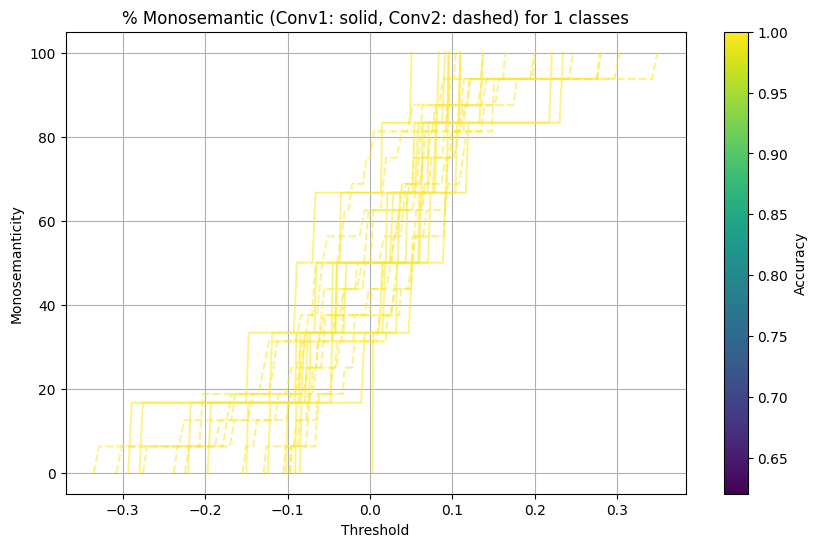

<ipython-input-7-bcbd94a4853e>:53: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Accuracy')


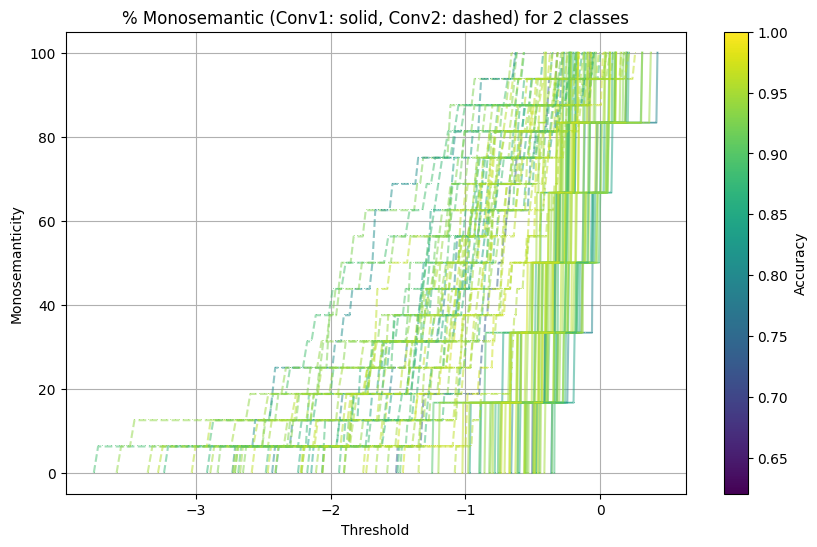

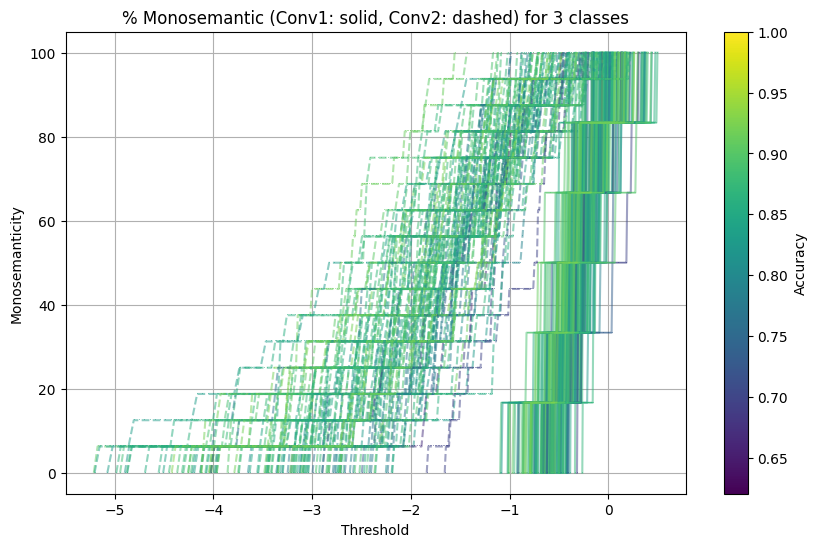

<ipython-input-7-bcbd94a4853e>:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.show()


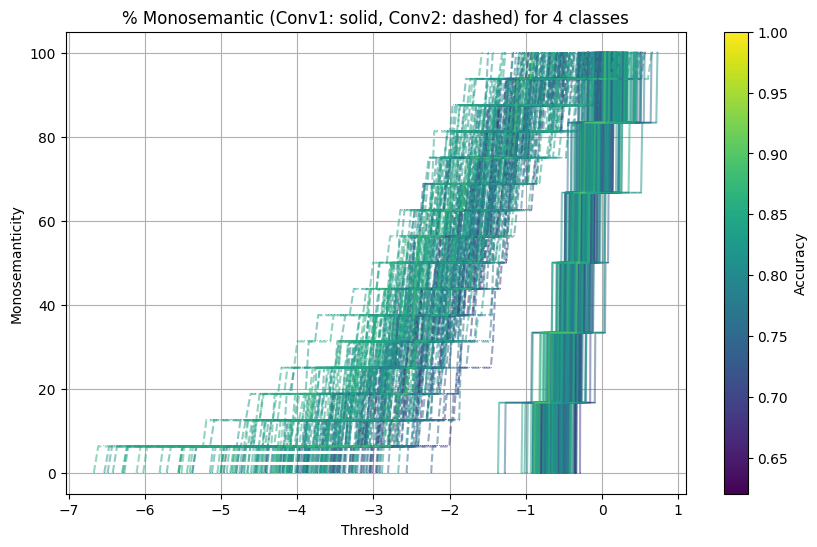

<ipython-input-7-bcbd94a4853e>:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.show()


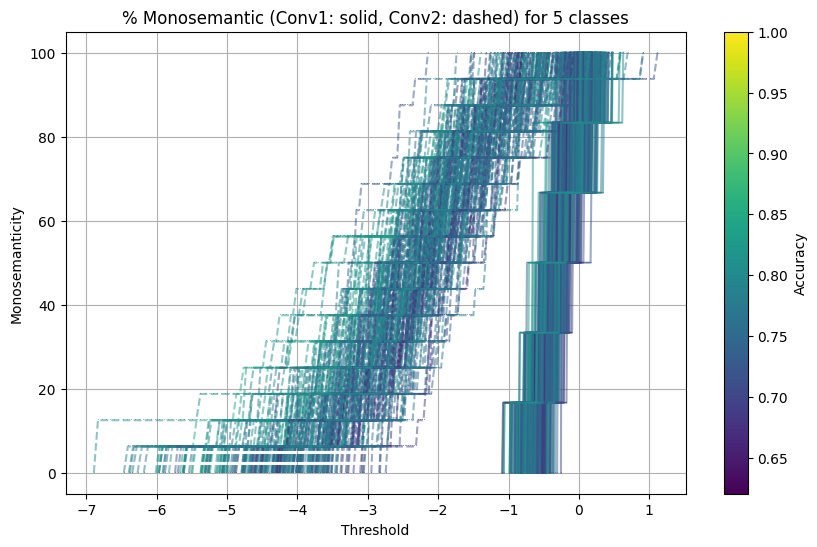

<ipython-input-7-bcbd94a4853e>:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.show()


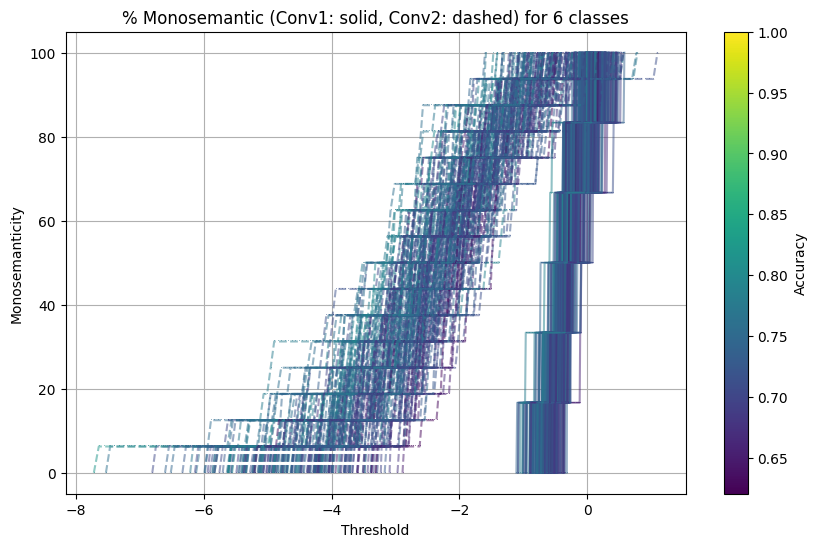

<ipython-input-7-bcbd94a4853e>:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.show()


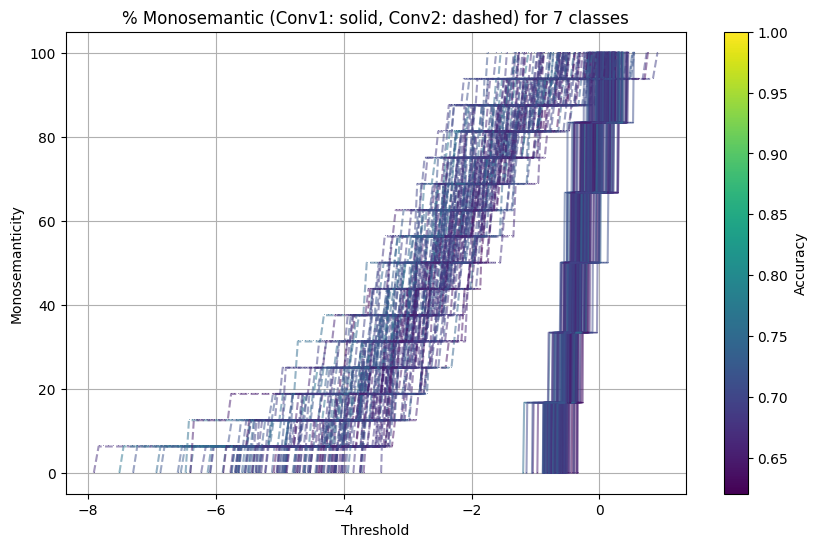

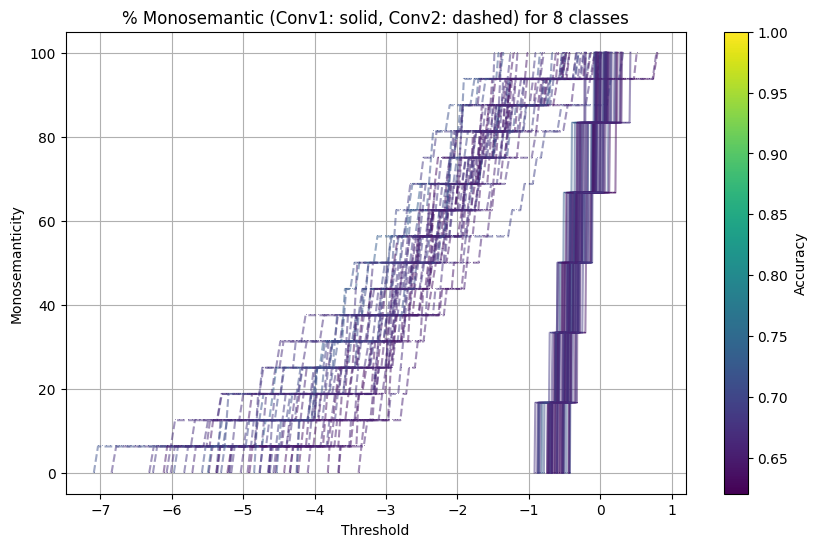

<ipython-input-7-bcbd94a4853e>:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.show()


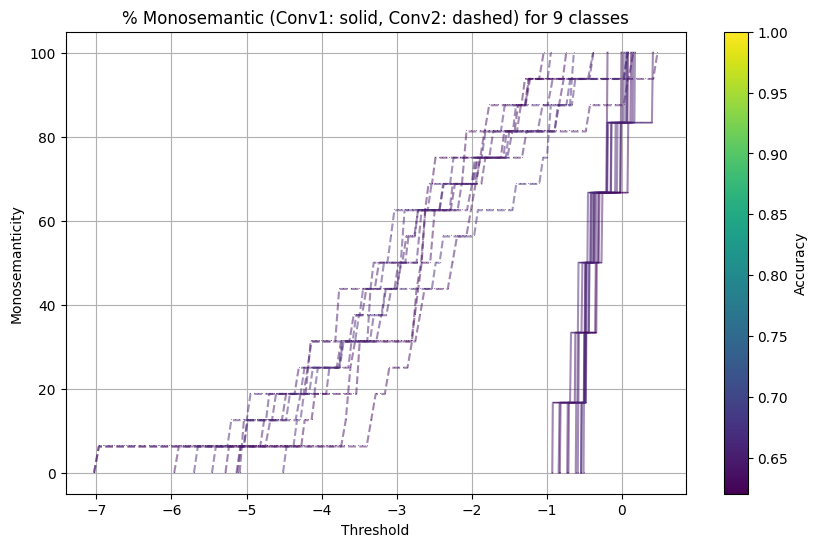

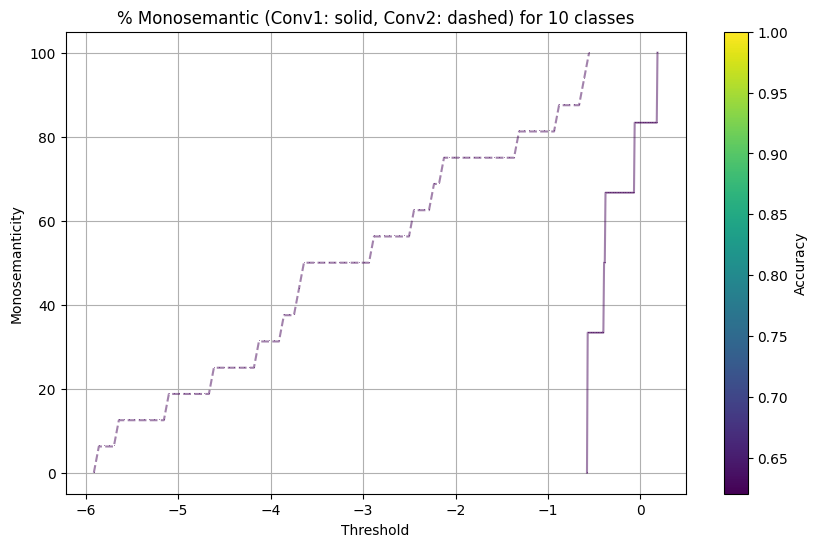

In [ ]:
#Plots each set of num_classes' conv2 graphs colored by accuracy. Generated with GPT4

import numpy as np
from collections import defaultdict
import matplotlib as mpl

data_dict = defaultdict(list)
accuracy_dict = defaultdict(list)
conv1_thresholds = np.linspace(-2, 1, 100)
conv2_thresholds = np.linspace(-9, 1, 100)

# Gather the data
for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df_m = pd.read_excel(file_path, sheet_name=1)
        df_accuracy = pd.read_excel(file_path, sheet_name="Accuracy")
        num_classes = file.count('_')
        data_dict[num_classes].append({"monosemanticity": df_m, "accuracy": df_accuracy["Accuracy"].mean()})

# Calculate the min and max accuracy
min_accuracy = min([dataset["accuracy"] for datasets in data_dict.values() for dataset in datasets])
max_accuracy = max([dataset["accuracy"] for datasets in data_dict.values() for dataset in datasets])

# Function to map average accuracy to color
def accuracy_to_color(accuracy, min_accuracy, max_accuracy):
    normalized_accuracy = (accuracy - min_accuracy) / (max_accuracy - min_accuracy)
    return plt.cm.viridis(normalized_accuracy)

# Create a scalar mappable object for the colormap
norm = mpl.colors.Normalize(vmin=min_accuracy, vmax=max_accuracy)
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])

# Plot Conv1 and Conv2 monosemanticity for each num_class
for num_classes, datasets in sorted(data_dict.items()):
    plt.figure(figsize=(10, 6))

    for dataset in datasets:
        df_m = dataset["monosemanticity"]
        accuracy = dataset["accuracy"]
        color = accuracy_to_color(accuracy, min_accuracy, max_accuracy)

        plt.plot(df_m['Conv1 Threshold'], df_m['Conv1 % Monosemantic Neurons'], linestyle='-', marker=markers[0], color=color, alpha=0.5)
        plt.plot(df_m['Conv2 Threshold'], df_m['Conv2 % Monosemantic Neurons'], linestyle='--', marker=markers[0], color=color, alpha=0.5)

    plt.xlabel('Threshold')
    plt.ylabel('Monosemanticity')
    plt.title(f'% Monosemantic (Conv1: solid, Conv2: dashed) for {num_classes} classes')
    plt.grid()

    # Add a colorbar
    plt.colorbar(sm, label='Accuracy')
    plt.show()


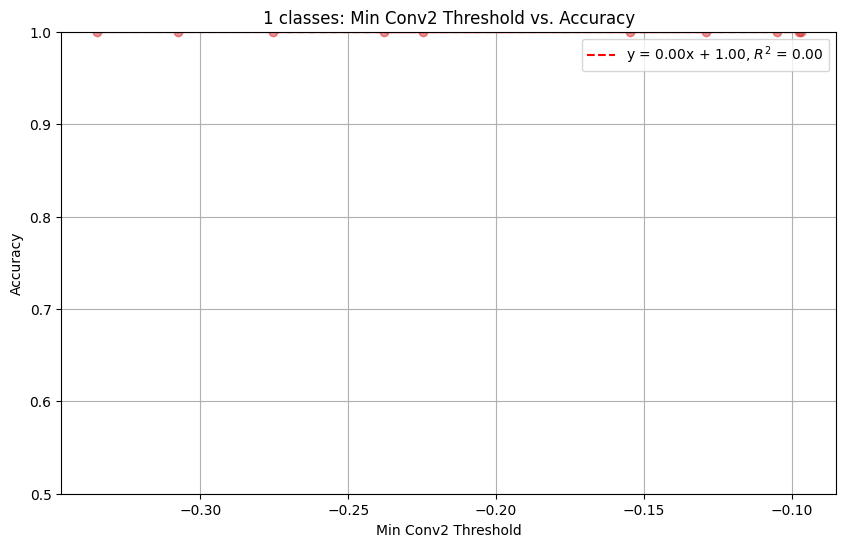

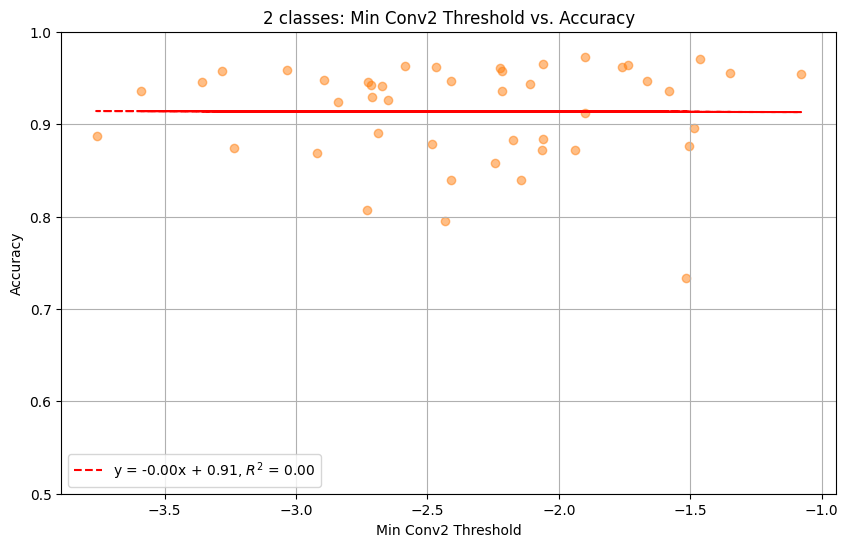

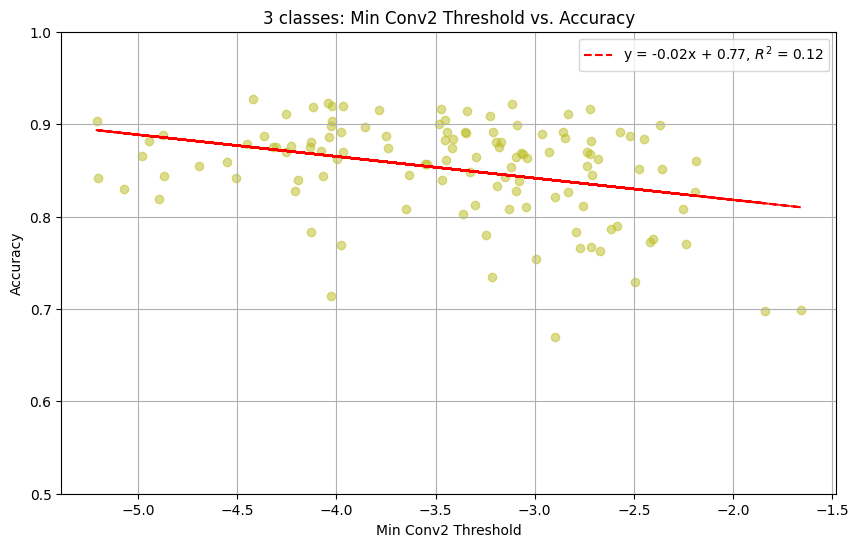

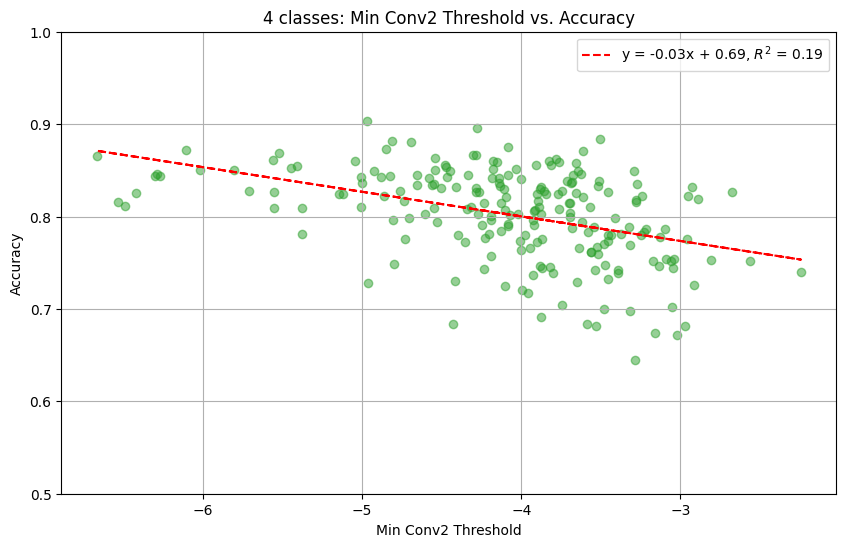

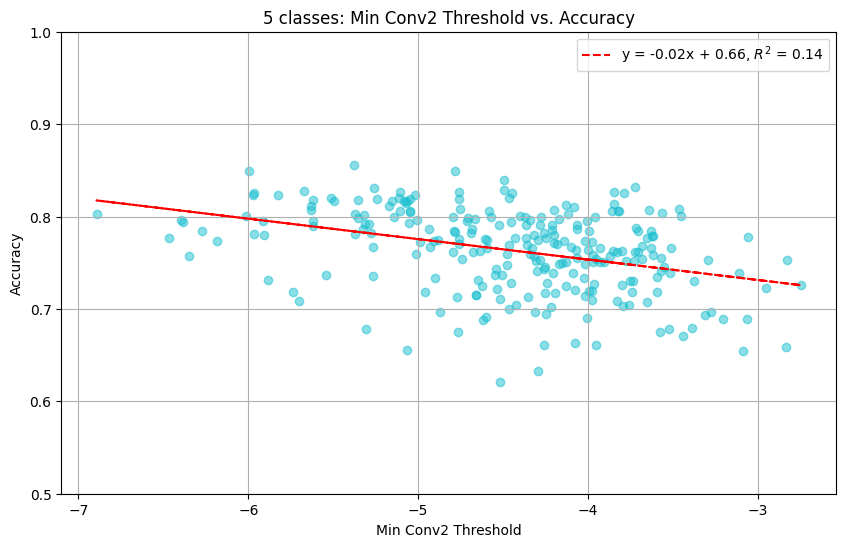

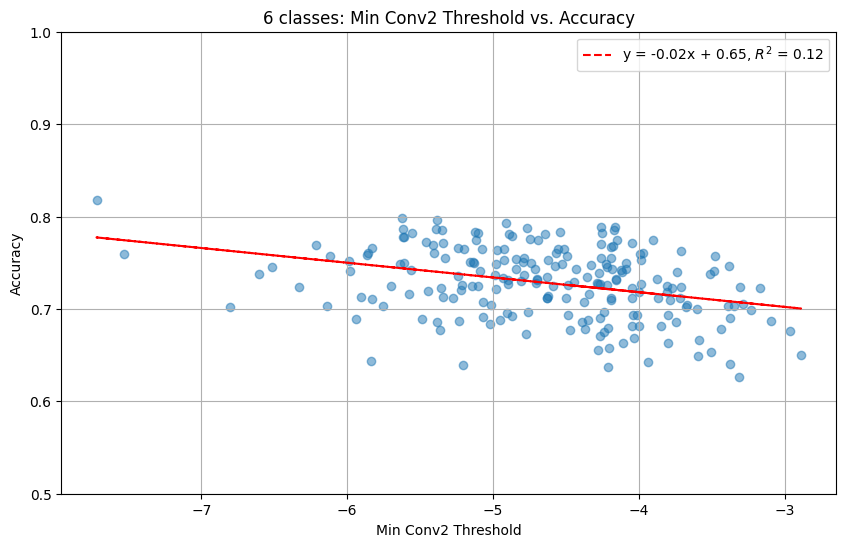

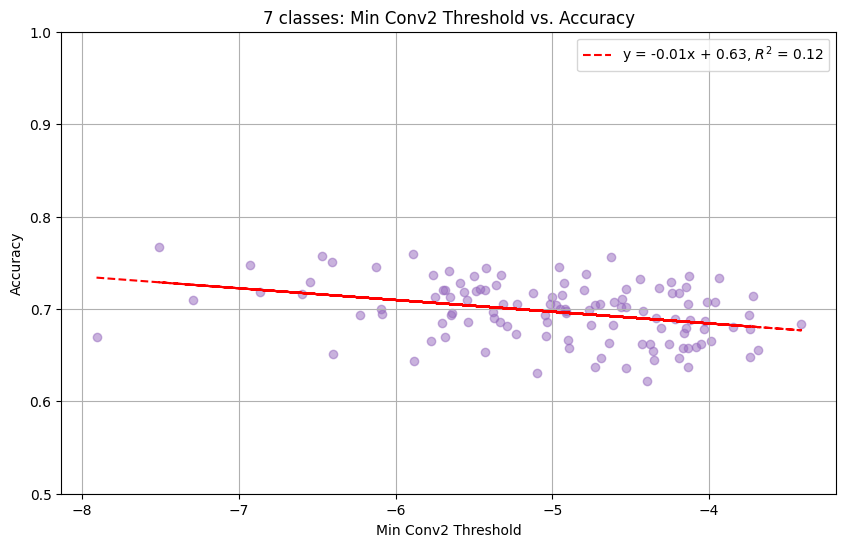

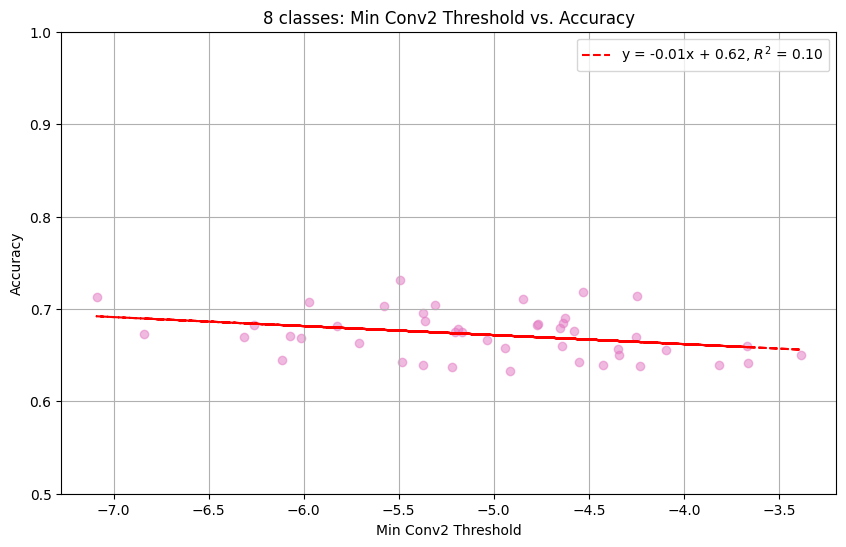

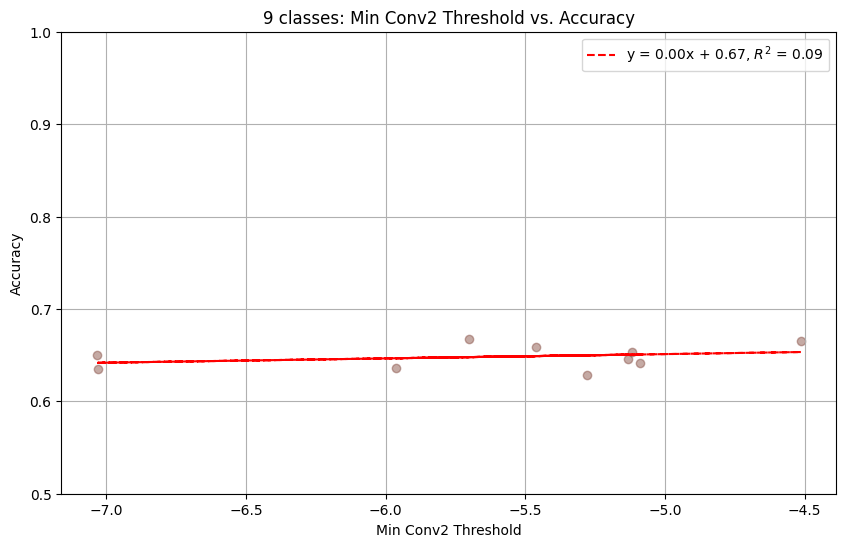

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


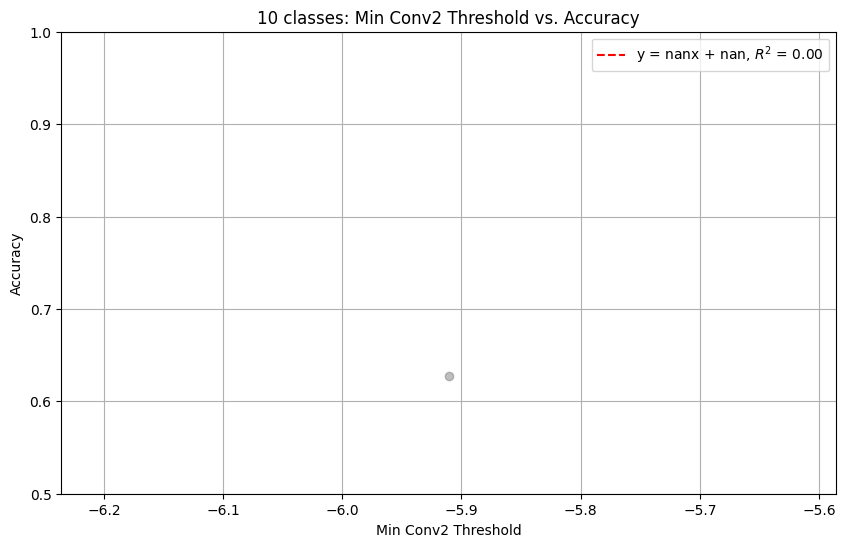

In [ ]:
#Displays each set of num_classes' minimum threshold value vs its accuracy and shows a trendline associated with it. This was generated in-part with GPT4

import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.stats import linregress

data_dict = defaultdict(list)

colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:brown', 'tab:gray']

# Gather the data
for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df_m = pd.read_excel(file_path, sheet_name=1)
        df_accuracy = pd.read_excel(file_path, sheet_name="Accuracy")
        num_classes = file.count('_')
        data_dict[num_classes].append({"monosemanticity": df_m, "accuracy": df_accuracy["Accuracy"].mean()})

# Plot the minimum Conv2 Threshold vs. Accuracy for each num_class with a linear trendline and display its equation and R^2 value
for num_classes, datasets in sorted(data_dict.items()):
    plt.figure(figsize=(10, 6))
    min_thresholds = []
    accuracies = []
    for dataset in datasets:
        df_m = dataset["monosemanticity"]
        accuracy = dataset["accuracy"]

        min_index = df_m['Conv2 % Monosemantic Neurons'].idxmin()
        min_threshold = df_m.loc[min_index, 'Conv2 Threshold']

        min_thresholds.append(min_threshold)
        accuracies.append(accuracy)

        plt.scatter(min_threshold, accuracy, color=colors[num_classes - 1], alpha=0.5)

    # Linear regression
    slope, intercept, r_value, _, _ = linregress(min_thresholds, accuracies)
    plt.plot(min_thresholds, [slope * x + intercept for x in min_thresholds], color='red', linestyle='--', label=f"y = {slope:.2f}x + {intercept:.2f}, $R^2$ = {r_value**2:.2f}")

    plt.ylim(0.5,1)
    plt.xlabel('Min Conv2 Threshold')
    plt.ylabel('Accuracy')
    plt.title(f'{num_classes} classes: Min Conv2 Threshold vs. Accuracy')
    plt.legend()
    plt.grid()
    plt.show()



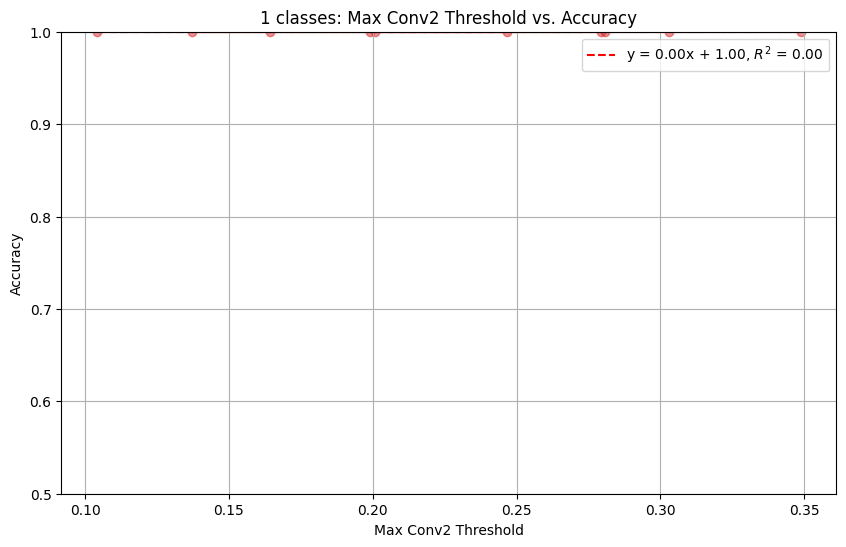

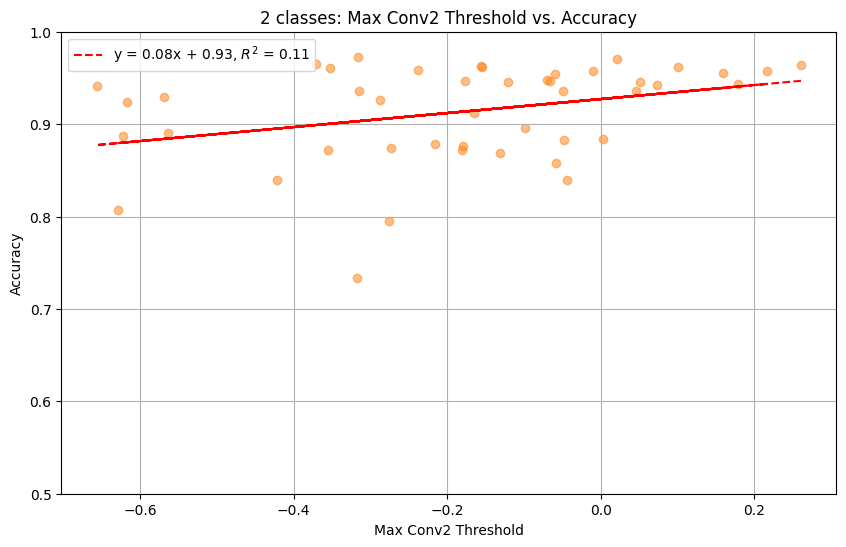

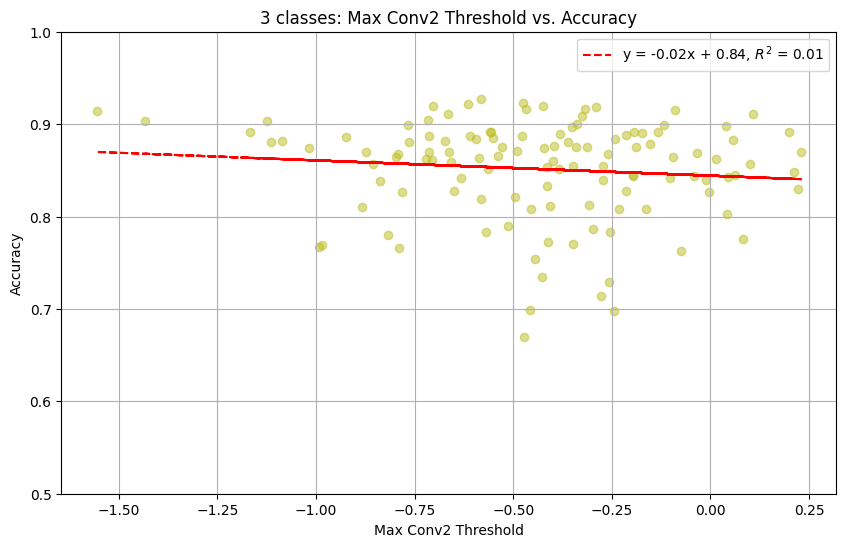

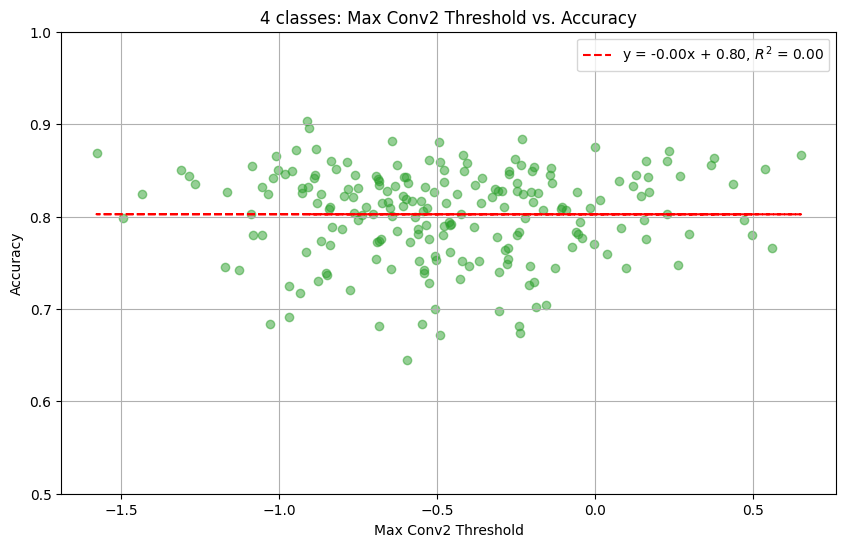

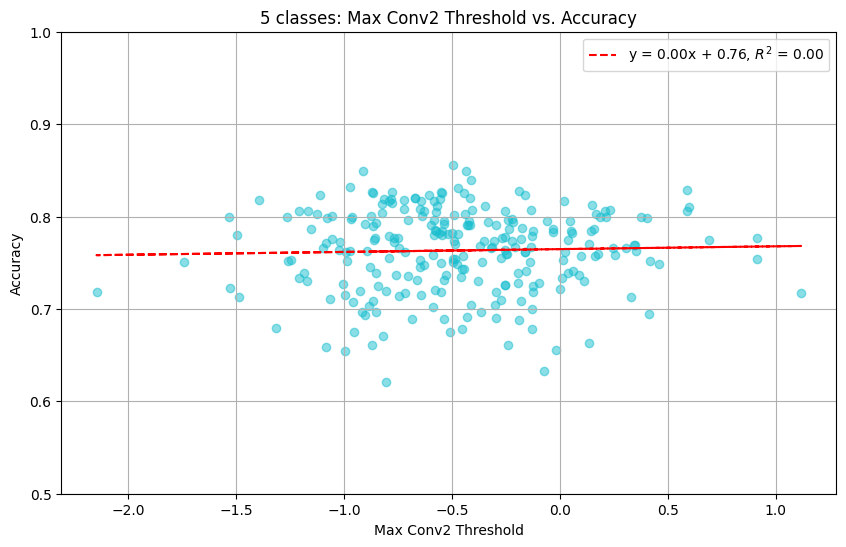

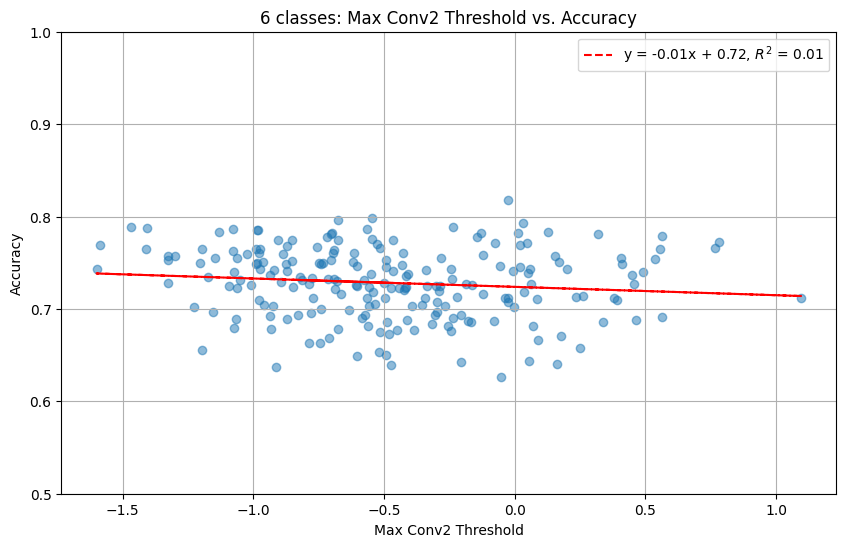

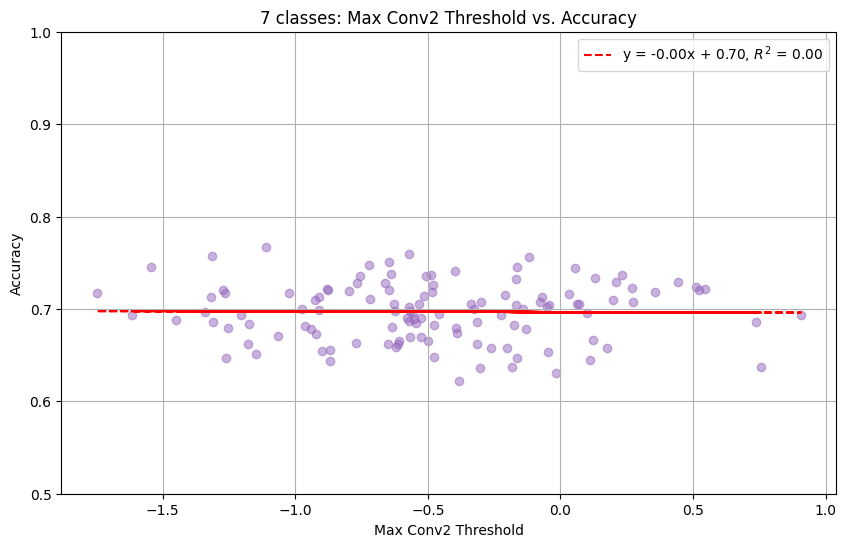

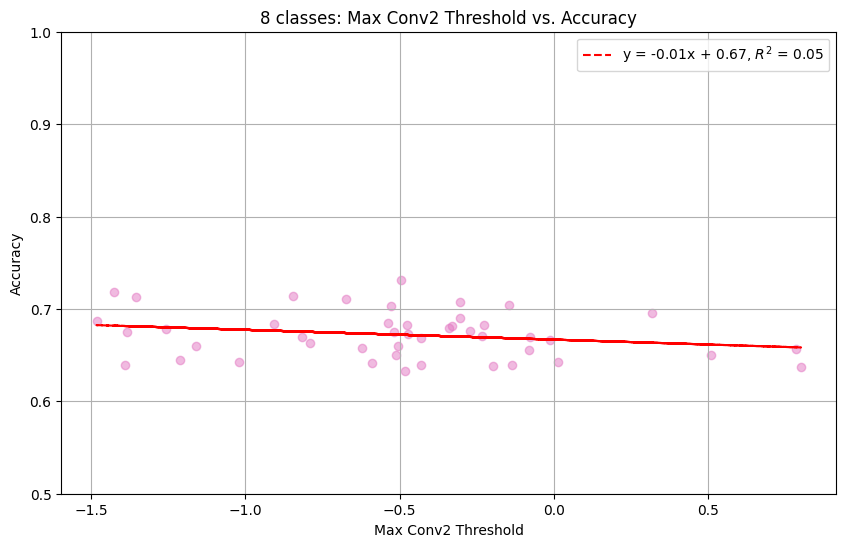

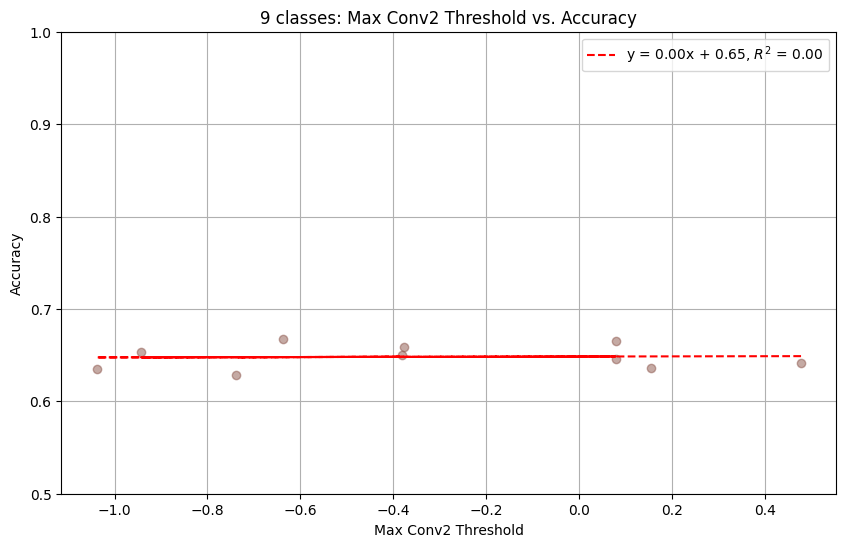

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


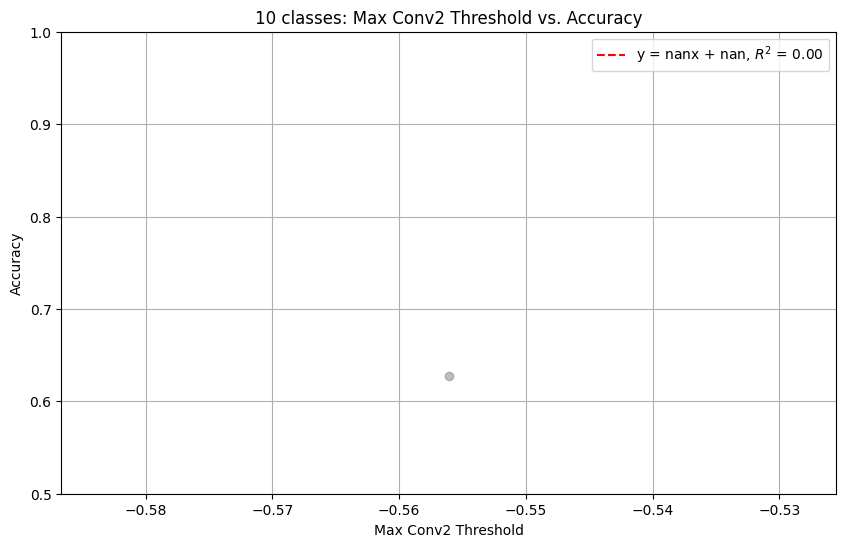

In [ ]:
#Displays each set of num_classes' maximum threshold value vs its accuracy and shows a trendline associated with it. This was generated in-part with GPT4

colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:brown', 'tab:gray']
for num_classes, datasets in sorted(data_dict.items()):
    plt.figure(figsize=(10, 6))
    max_thresholds = []
    accuracies = []
    for dataset in datasets:
        df_m = dataset["monosemanticity"]
        accuracy = dataset["accuracy"]

        max_index = df_m['Conv2 % Monosemantic Neurons'].idxmax()
        max_threshold = df_m.loc[max_index, 'Conv2 Threshold']

        max_thresholds.append(max_threshold)
        accuracies.append(accuracy)

        plt.scatter(max_threshold, accuracy, color=colors[num_classes - 1], alpha=0.5)

    # Linear regression
    slope, intercept, r_value, _, _ = linregress(max_thresholds, accuracies)
    plt.plot(max_thresholds, [slope * x + intercept for x in max_thresholds], color='red', linestyle='--', label=f"y = {slope:.2f}x + {intercept:.2f}, $R^2$ = {r_value**2:.2f}")

    plt.ylim(0.5, 1)
    plt.xlabel('Max Conv2 Threshold')
    plt.ylabel('Accuracy')
    plt.title(f'{num_classes} classes: Max Conv2 Threshold vs. Accuracy')
    plt.legend()
    plt.grid()
    plt.show()


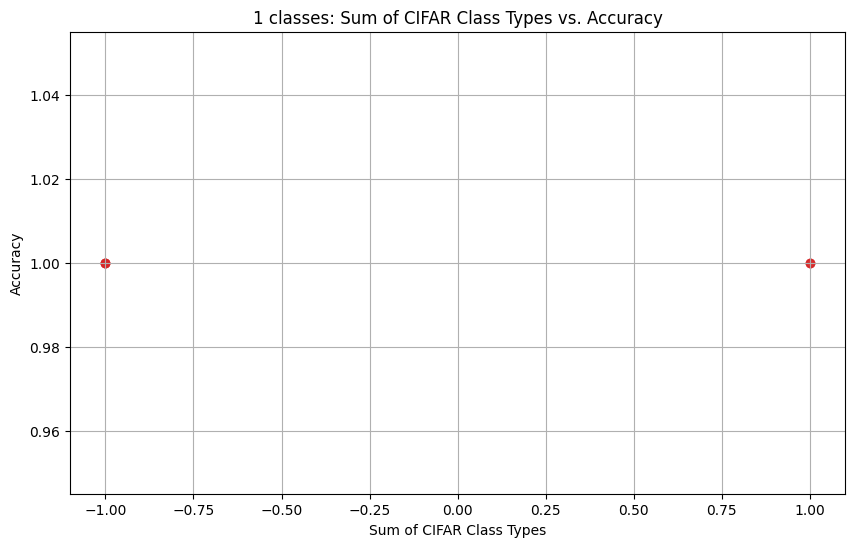

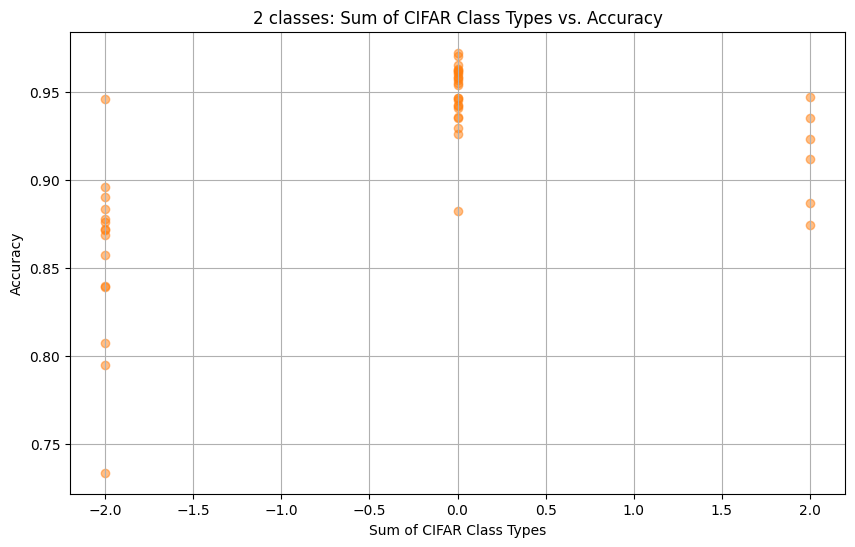

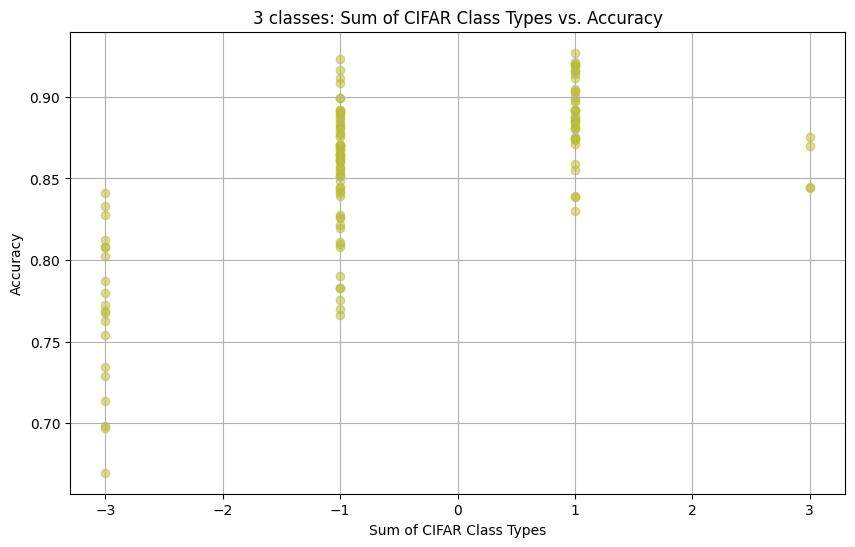

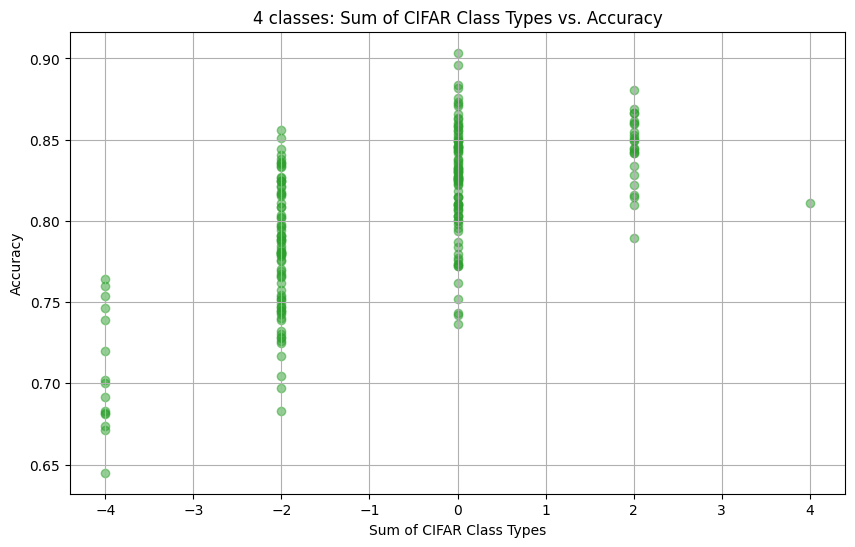

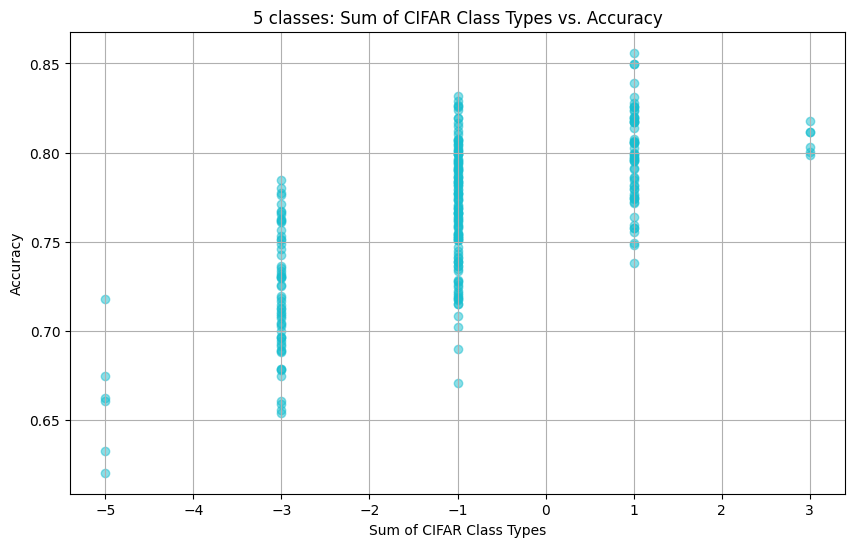

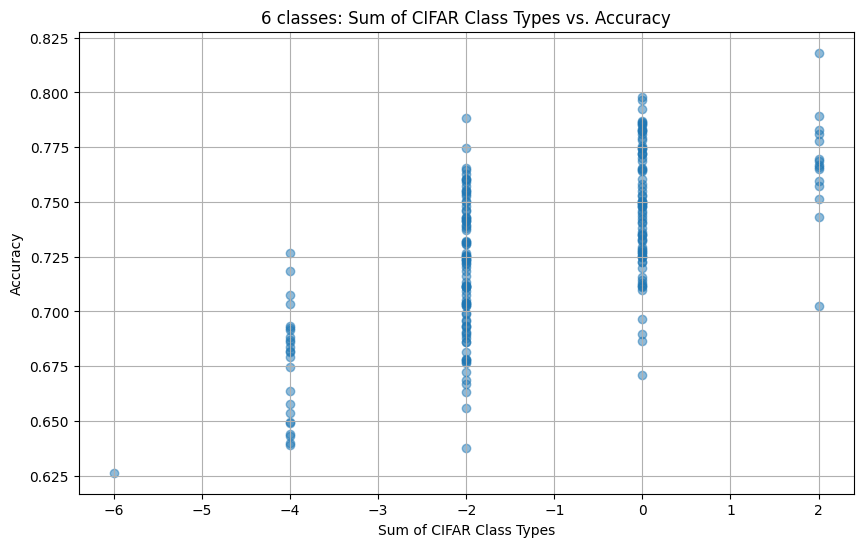

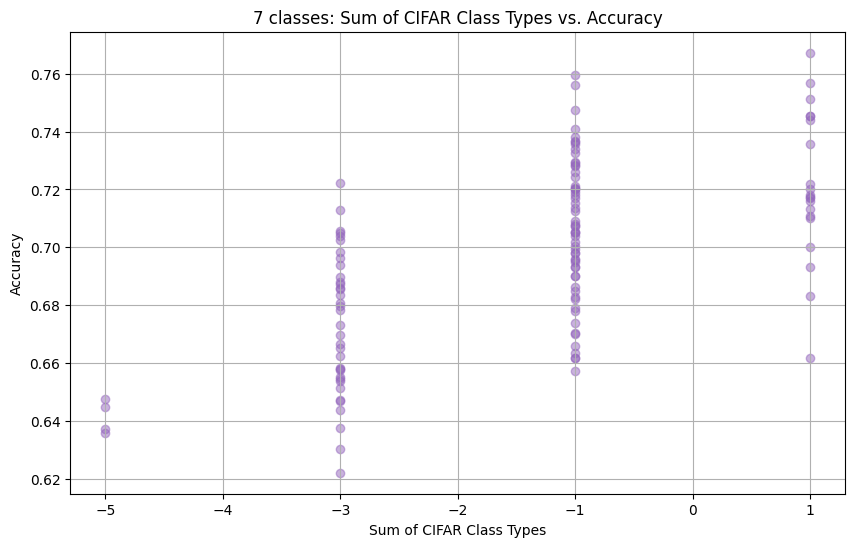

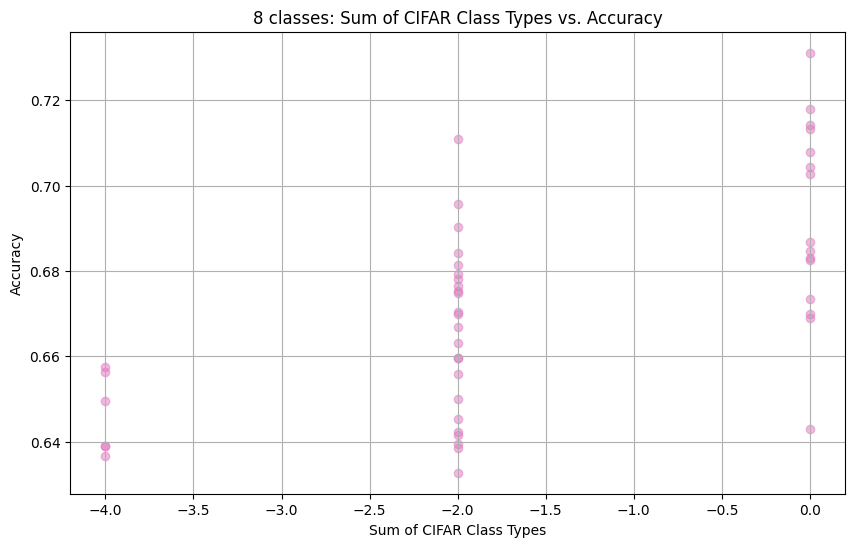

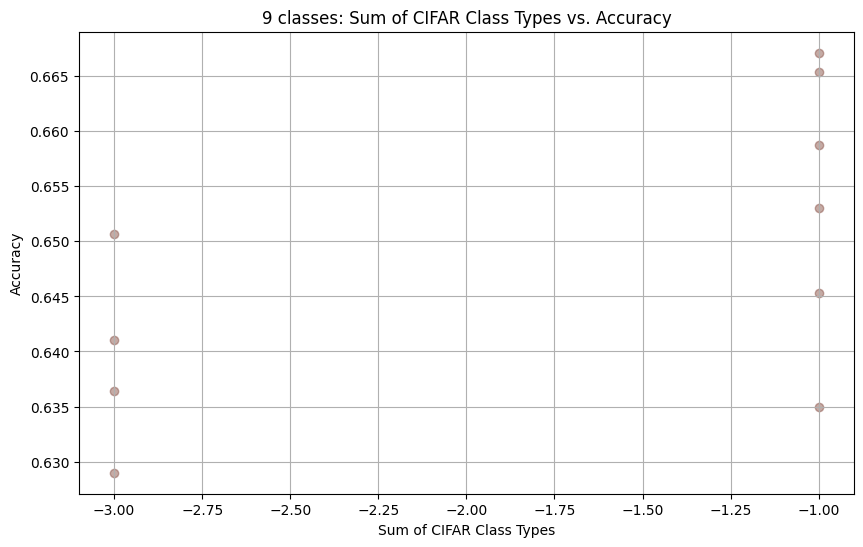

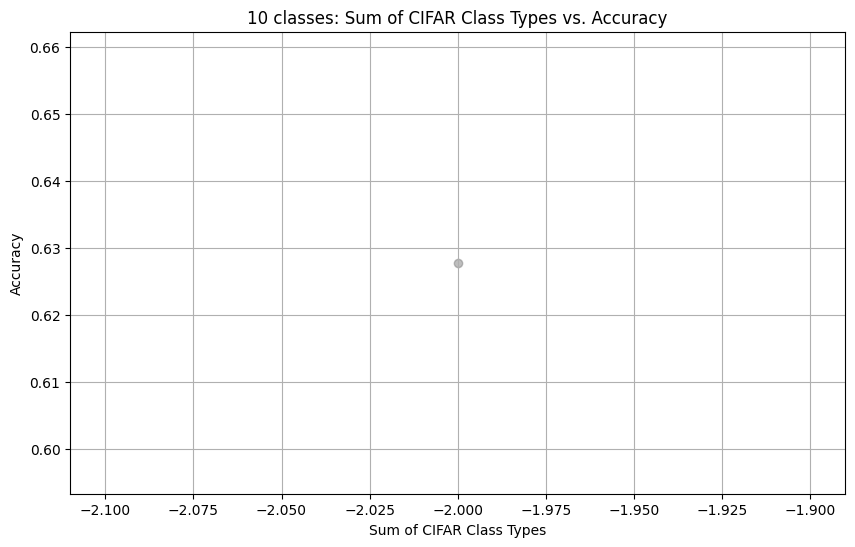

In [ ]:
#Plots variety of each set of num_classes vs accuracy. Written in part with GPT4

import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

folder_path = "/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/"

cifar_class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
cifar_class_types = [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:brown', 'tab:gray']

# Read all Excel files and store the data in a dictionary
data_dict = defaultdict(list)
for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df_accuracy = pd.read_excel(file_path, sheet_name="Accuracy")

        num_classes = file.count('_')

        selected_classes = [i for i, name in enumerate(cifar_class_names) if name in file.lower()]

        sum_class_types = sum(cifar_class_types[i] for i in selected_classes)

        data_dict[num_classes].append({
            "sum_class_types": sum_class_types,
            "accuracy": df_accuracy["Accuracy"].iloc[-1]
        })

# Plot the data
for num_classes, datasets in sorted(data_dict.items()):
    plt.figure(figsize=(10, 6))

    for dataset in datasets:
        sum_class_types = dataset["sum_class_types"]
        accuracy = dataset["accuracy"]

        plt.scatter(sum_class_types, accuracy, color=colors[num_classes - 1], alpha=0.5)

    plt.xlabel('Sum of CIFAR Class Types')
    plt.ylabel('Accuracy')
    plt.title(f'{num_classes} classes: Sum of CIFAR Class Types vs. Accuracy')
    plt.grid()
    plt.show()


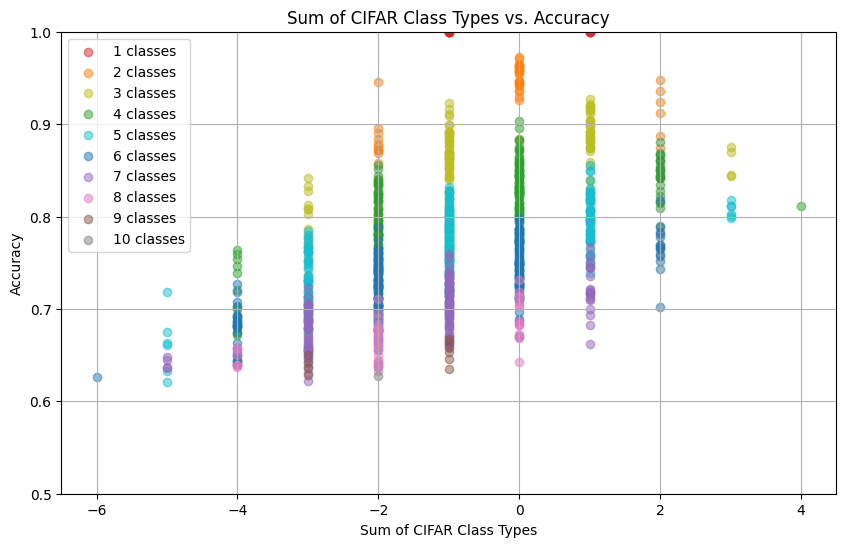

In [ ]:
#Plots the class variety on the x-axis and the accuracy on the Y axis. Separates by num_classes - Written in-part by GPT4

import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

folder_path = "/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/"

cifar_class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
cifar_class_types = [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:brown', 'tab:gray']

# Read all Excel files and store the data in a dictionary
data_dict = defaultdict(list)
for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df_accuracy = pd.read_excel(file_path, sheet_name="Accuracy")

        num_classes = file.count('_')

        selected_classes = [i for i, name in enumerate(cifar_class_names) if name in file.lower()]

        sum_class_types = sum(cifar_class_types[i] for i in selected_classes)

        data_dict[num_classes].append({
            "sum_class_types": sum_class_types,
            "accuracy": df_accuracy["Accuracy"].iloc[-1]
        })

# Plot the data
plt.figure(figsize=(10, 6))

for num_classes, datasets in sorted(data_dict.items()):
    for dataset in datasets:
        sum_class_types = dataset["sum_class_types"]
        accuracy = dataset["accuracy"]

        plt.scatter(sum_class_types, accuracy, alpha=0.5, color=colors[num_classes - 1], label=f"{num_classes} classes")

# Remove duplicates from the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.ylim(0.5,1)
plt.xlabel('Sum of CIFAR Class Types')
plt.ylabel('Accuracy')
plt.title('Sum of CIFAR Class Types vs. Accuracy')
plt.grid()
plt.show()


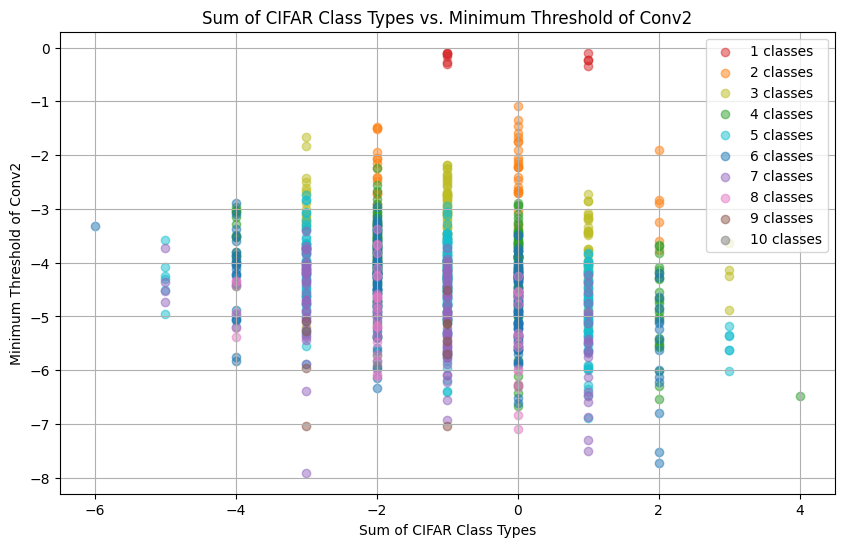

In [ ]:
#Displays the variety of class types on the x axis and the max polysemanticity on the y axis for all num_classes. Make by GPT4

import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

folder_path = "/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/"

cifar_class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
cifar_class_types = [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:brown', 'tab:gray']

# Read all Excel files and store the data in a dictionary
data_dict = defaultdict(list)
for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df_monosemanticity = pd.read_excel(file_path, sheet_name="Monosemanticity")

        num_classes = file.count('_')

        selected_classes = [i for i, name in enumerate(cifar_class_names) if name in file.lower()]

        sum_class_types = sum(cifar_class_types[i] for i in selected_classes)

        min_threshold_conv2 = df_monosemanticity['Conv2 Threshold'].min()

        data_dict[num_classes].append({
            "sum_class_types": sum_class_types,
            "min_threshold_conv2": min_threshold_conv2
        })

# Plot the data
plt.figure(figsize=(10, 6))

for num_classes, datasets in sorted(data_dict.items()):
    for dataset in datasets:
        sum_class_types = dataset["sum_class_types"]
        min_threshold_conv2 = dataset["min_threshold_conv2"]

        plt.scatter(sum_class_types, min_threshold_conv2, alpha=0.5, color=colors[num_classes - 1], label=f"{num_classes} classes")

# Remove duplicates from the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Sum of CIFAR Class Types')
plt.ylabel('Minimum Threshold of Conv2')
plt.title('Sum of CIFAR Class Types vs. Minimum Threshold of Conv2')
plt.grid()
plt.show()


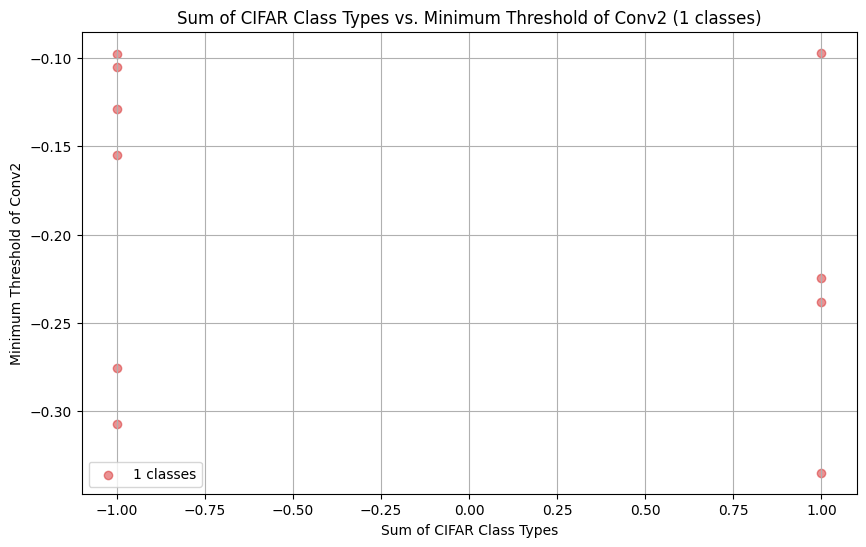

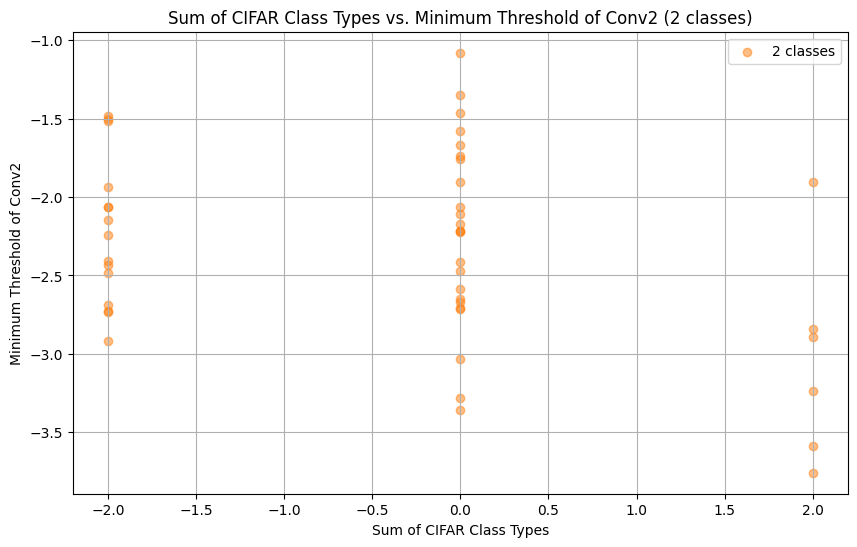

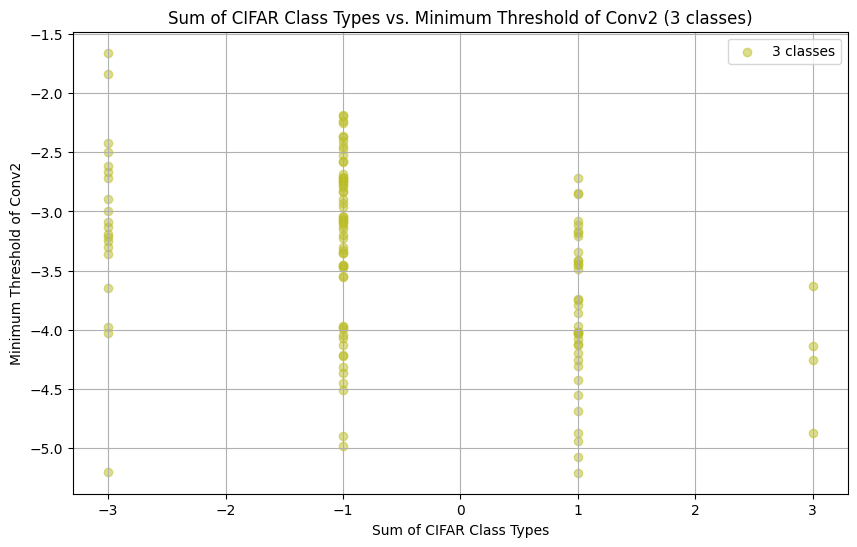

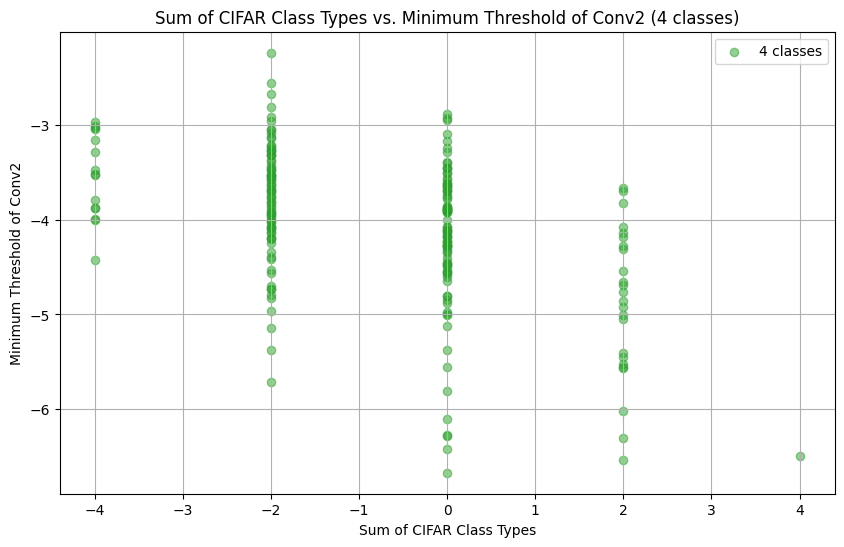

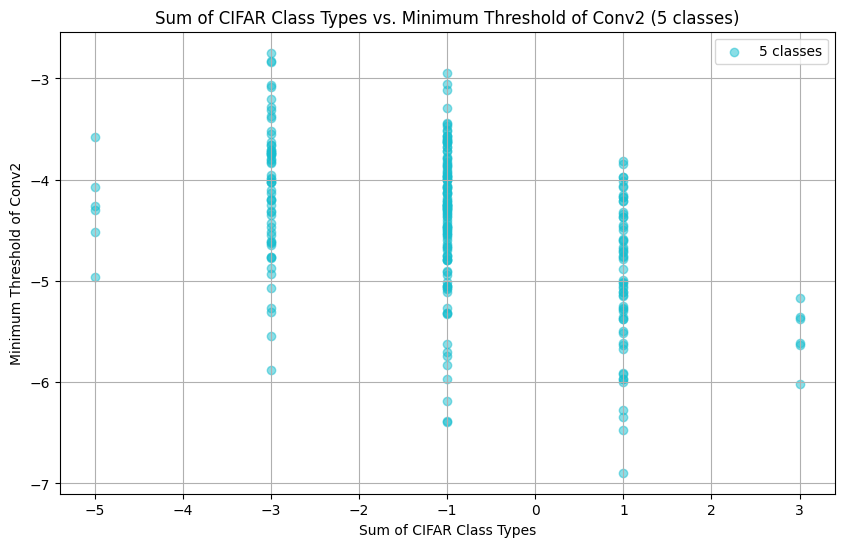

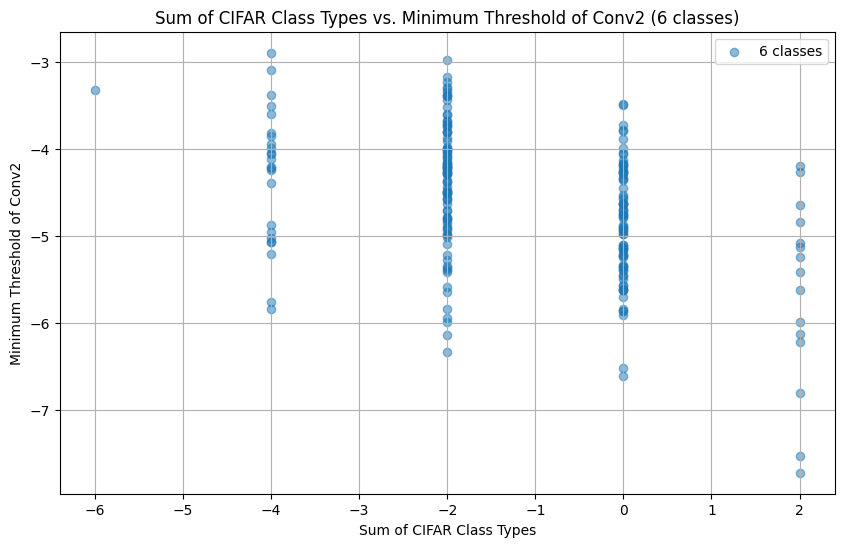

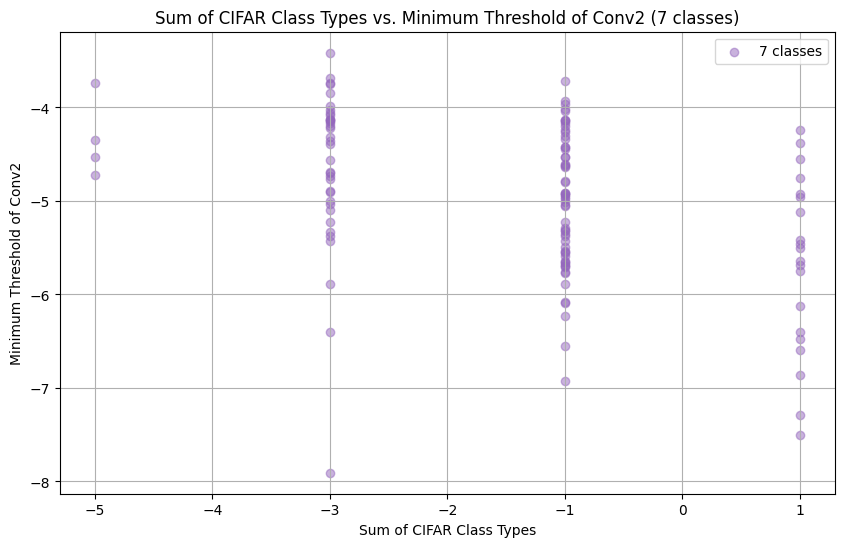

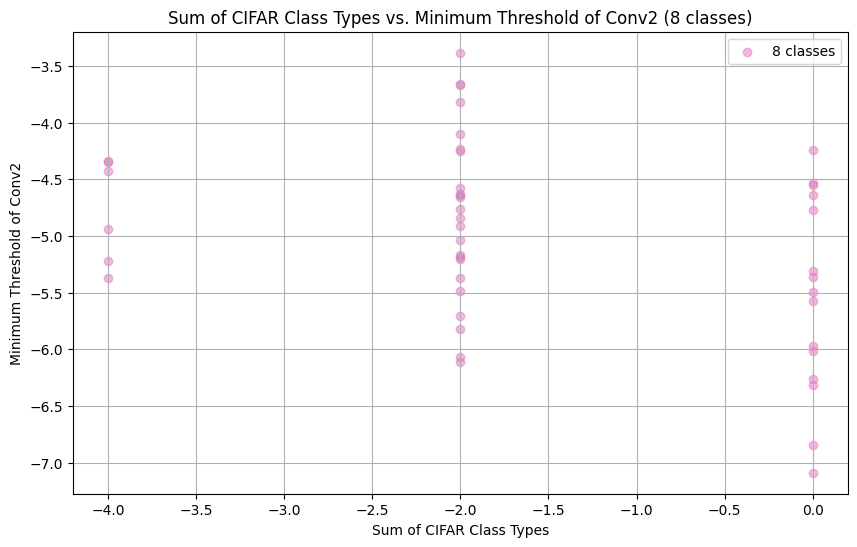

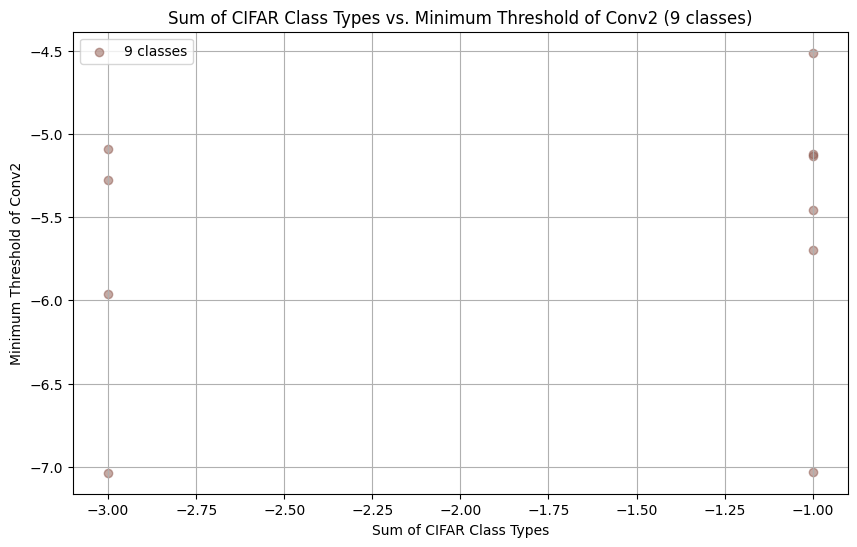

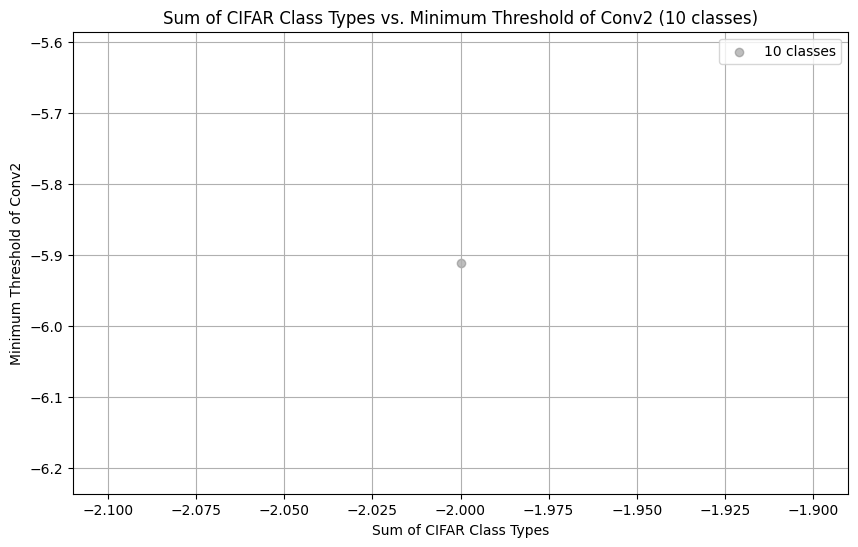

In [ ]:
#Displays the variety of class types on the x axis and the max polysemanticity on the y axis for each num_classes. Make by GPT4

import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

folder_path = "/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/"

cifar_class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
cifar_class_types = [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:brown', 'tab:gray']

# Read all Excel files and store the data in a dictionary
data_dict = defaultdict(list)
for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df_monosemanticity = pd.read_excel(file_path, sheet_name="Monosemanticity")

        num_classes = file.count('_')

        selected_classes = [i for i, name in enumerate(cifar_class_names) if name in file.lower()]

        sum_class_types = sum(cifar_class_types[i] for i in selected_classes)

        min_threshold_conv2 = df_monosemanticity['Conv2 Threshold'].min()

        data_dict[num_classes].append({
            "sum_class_types": sum_class_types,
            "min_threshold_conv2": min_threshold_conv2
        })

# Plot the data
for num_classes, datasets in sorted(data_dict.items()):
    plt.figure(figsize=(10, 6))

    for dataset in datasets:
        sum_class_types = dataset["sum_class_types"]
        min_threshold_conv2 = dataset["min_threshold_conv2"]

        plt.scatter(sum_class_types, min_threshold_conv2, alpha=0.5, color=colors[num_classes - 1], label=f"{num_classes} classes")

    # Remove duplicates from the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.xlabel('Sum of CIFAR Class Types')
    plt.ylabel('Minimum Threshold of Conv2')
    plt.title(f'Sum of CIFAR Class Types vs. Minimum Threshold of Conv2 ({num_classes} classes)')
    plt.grid()
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


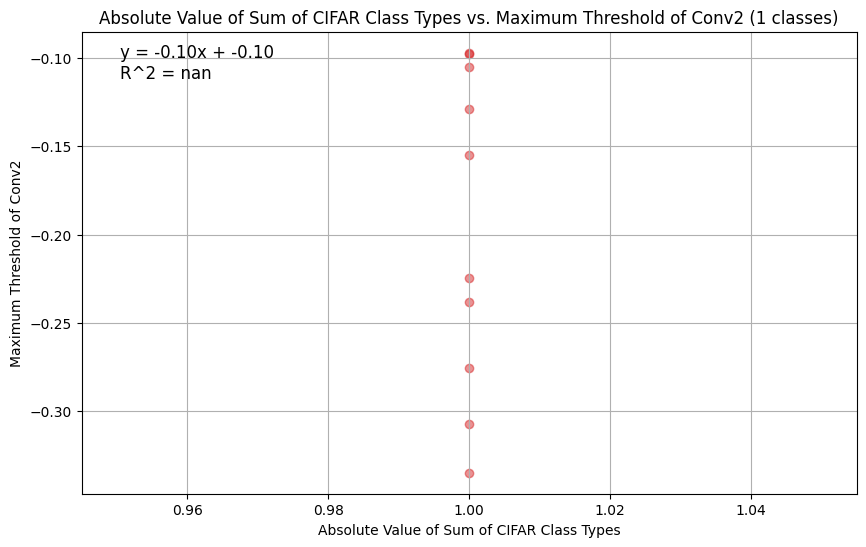

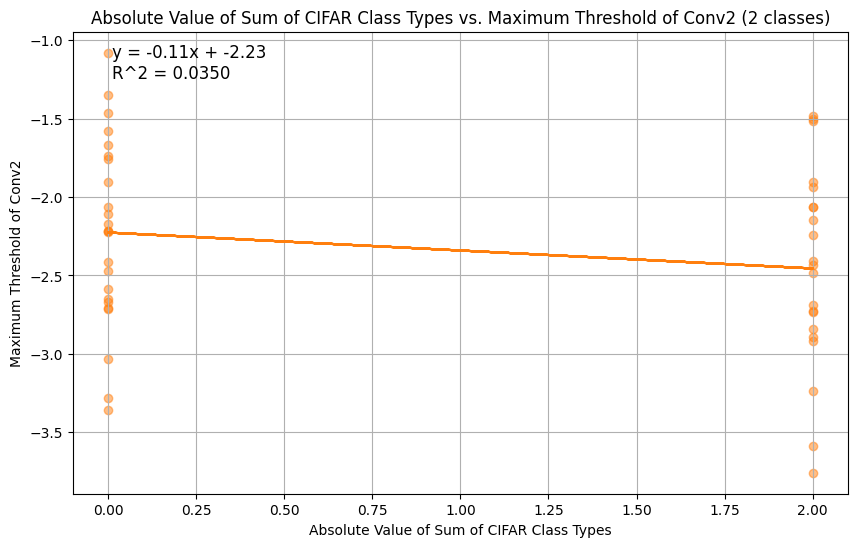

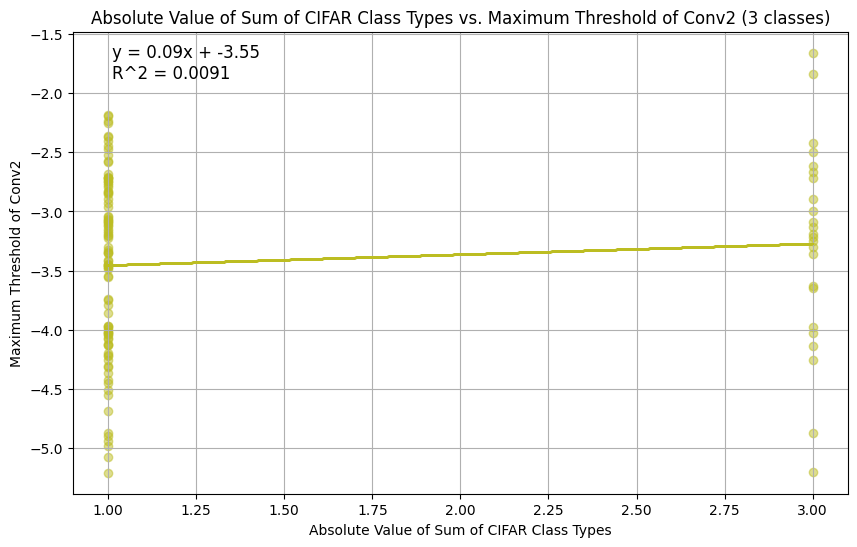

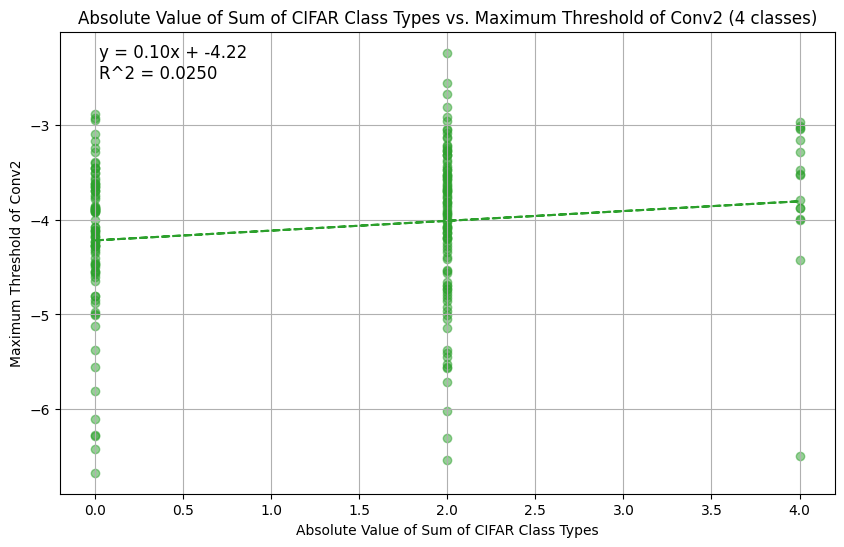

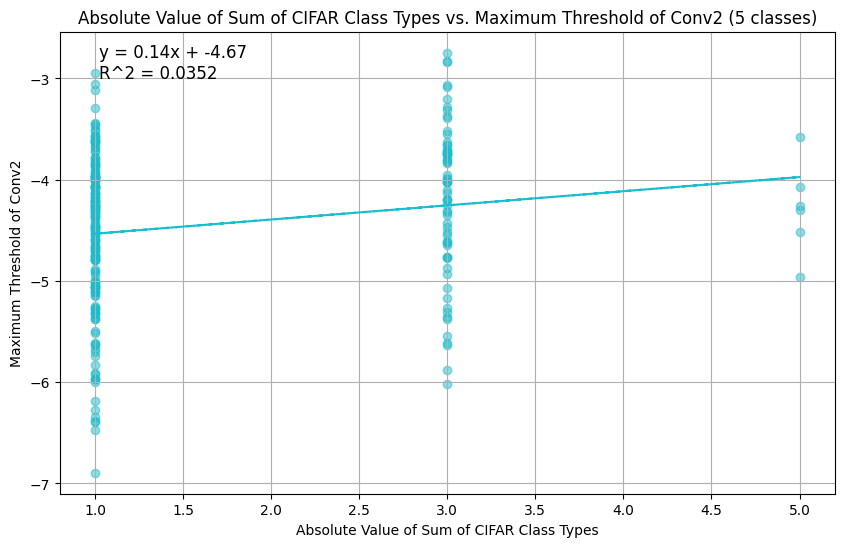

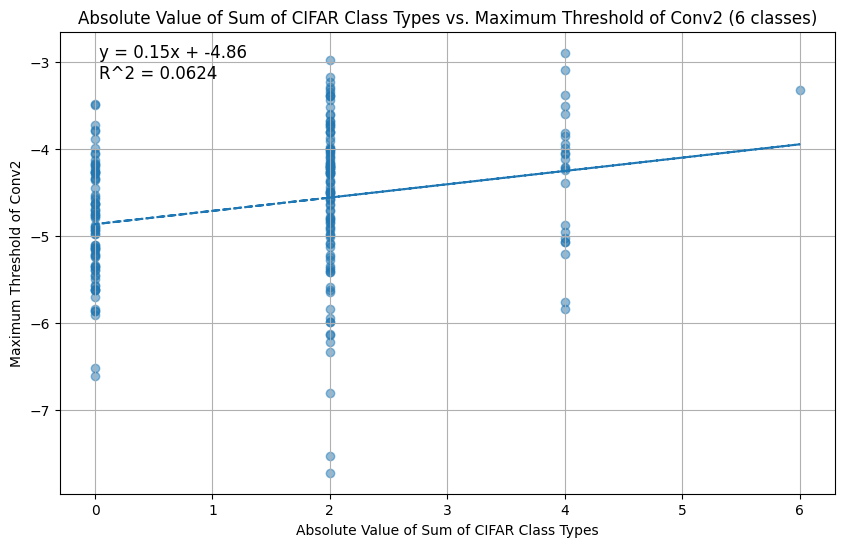

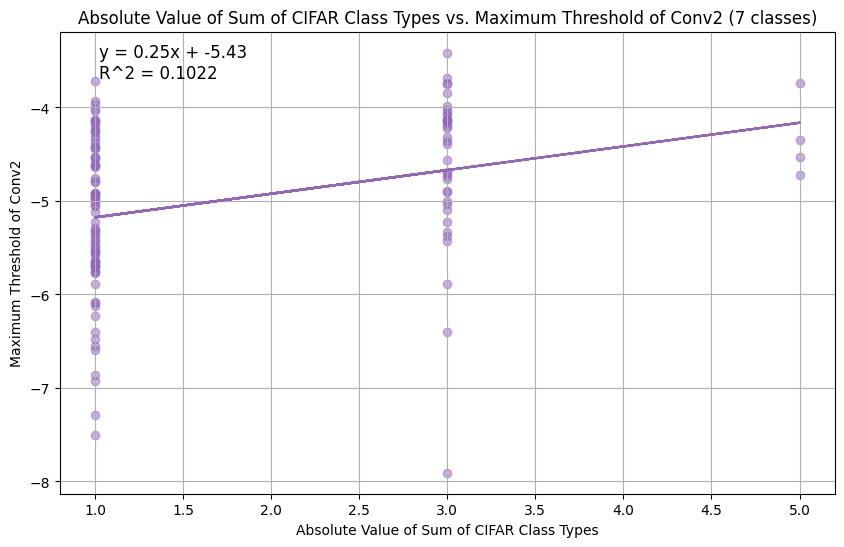

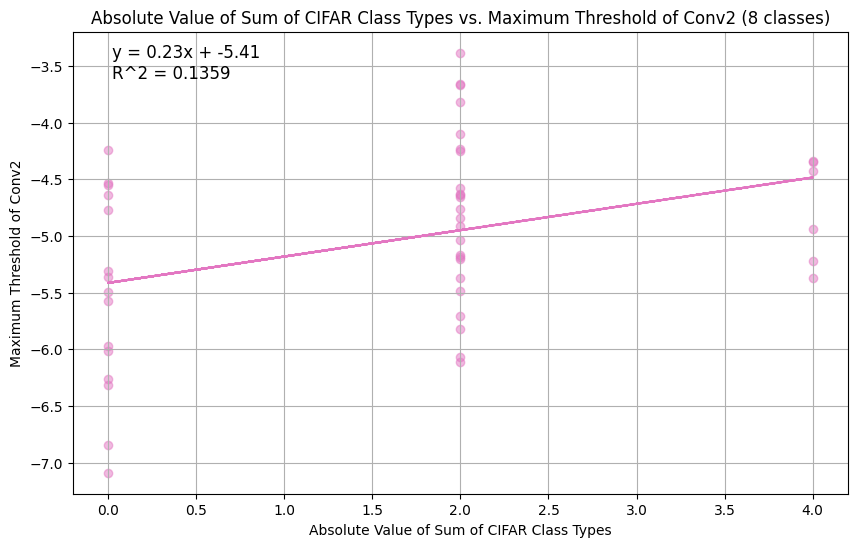

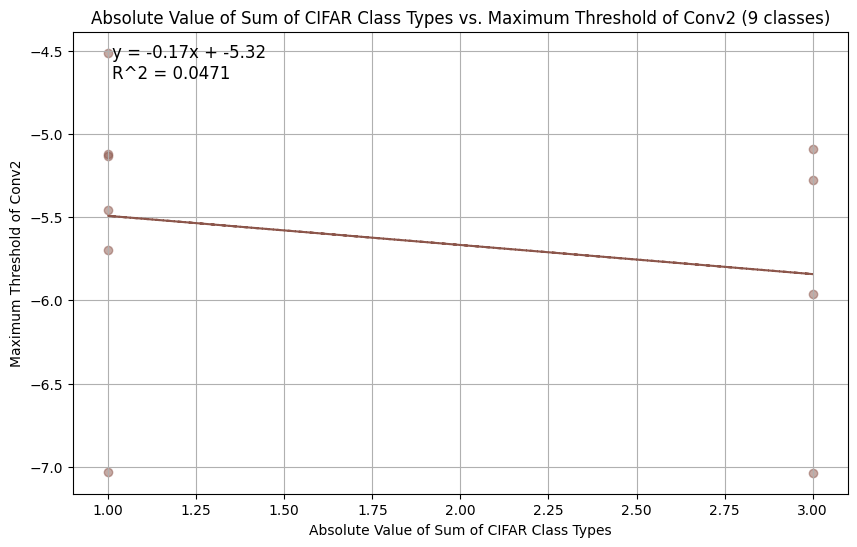

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


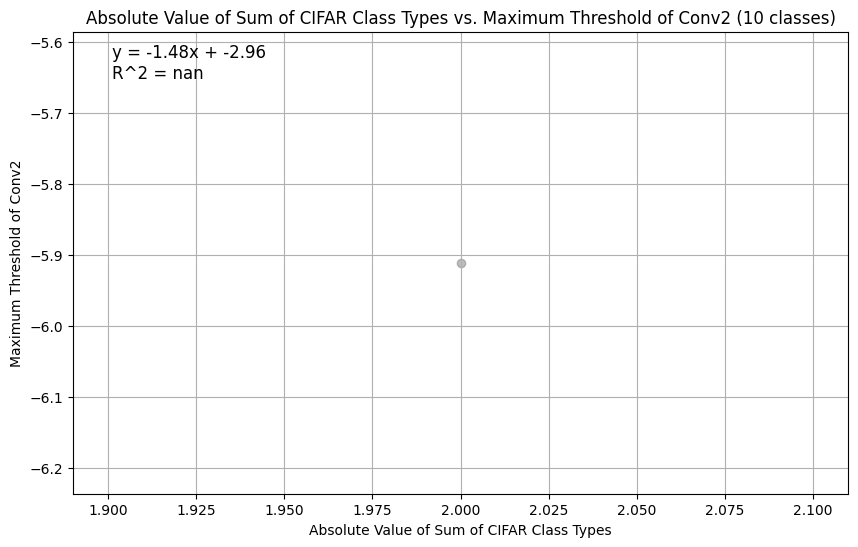

In [5]:
#Displays the variety of class types on the x axis and the max polysemanticity on the y axis for each num_classes. Make by GPT4
#Includes trendline
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

folder_path = "/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/"

cifar_class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
cifar_class_types = [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:brown', 'tab:gray']

# Read all Excel files and store the data in a dictionary
data_dict = defaultdict(list)
for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df_monosemanticity = pd.read_excel(file_path, sheet_name="Monosemanticity")

        num_classes = file.count('_')

        selected_classes = [i for i, name in enumerate(cifar_class_names) if name in file.lower()]

        sum_class_types = sum(cifar_class_types[i] for i in selected_classes)

        max_threshold_conv2 = df_monosemanticity['Conv2 Threshold'].min()

        data_dict[num_classes].append({
            "abs_sum_class_types": abs(sum_class_types),
            "max_threshold_conv2": max_threshold_conv2
        })

# Plot the data
for num_classes, datasets in sorted(data_dict.items()):
    plt.figure(figsize=(10, 6))

    x_values = []
    y_values = []
    for dataset in datasets:
        abs_sum_class_types = dataset["abs_sum_class_types"]
        max_threshold_conv2 = dataset["max_threshold_conv2"]

        x_values.append(abs_sum_class_types)
        y_values.append(max_threshold_conv2)

        plt.scatter(abs_sum_class_types, max_threshold_conv2, alpha=0.5, color=colors[num_classes - 1])

    # Add trendline, equation, and R^2 value
    z = np.polyfit(x_values, y_values, 1)
    p = np.poly1d(z)
    plt.plot(x_values, p(x_values), linestyle='--', color=colors[num_classes - 1], label=f'Trendline ({num_classes} classes)')

    equation = f'y = {z[0]:.2f}x + {z[1]:.2f}'
    r_squared = f'R^2 = {np.corrcoef(x_values, y_values)[0, 1] ** 2:.4f}'
    plt.annotate(f'{equation}\n{r_squared}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

    plt.xlabel('Absolute Value of Sum of CIFAR Class Types')
    plt.ylabel('Maximum Threshold of Conv2')
    plt.title(f'Absolute Value of Sum of CIFAR Class Types vs. Maximum Threshold of Conv2 ({num_classes} classes)')
    #plt.legend()
    plt.grid()
    plt.show()


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


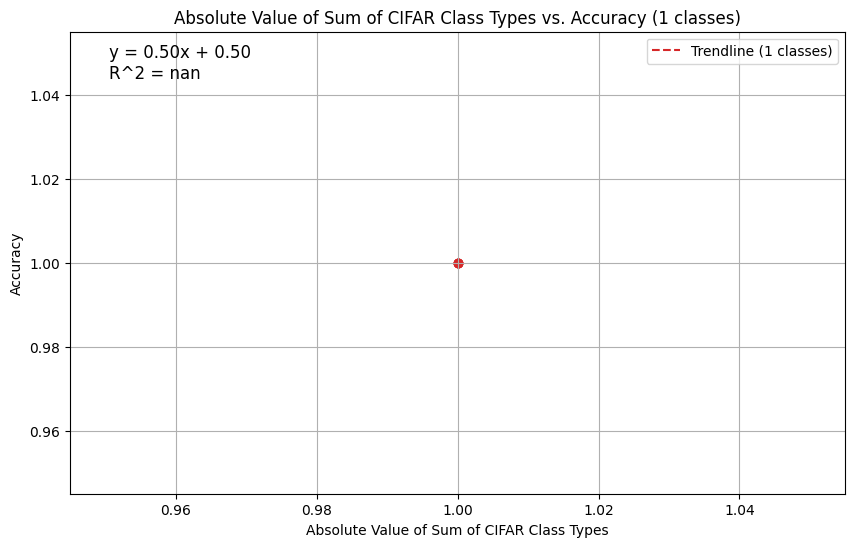

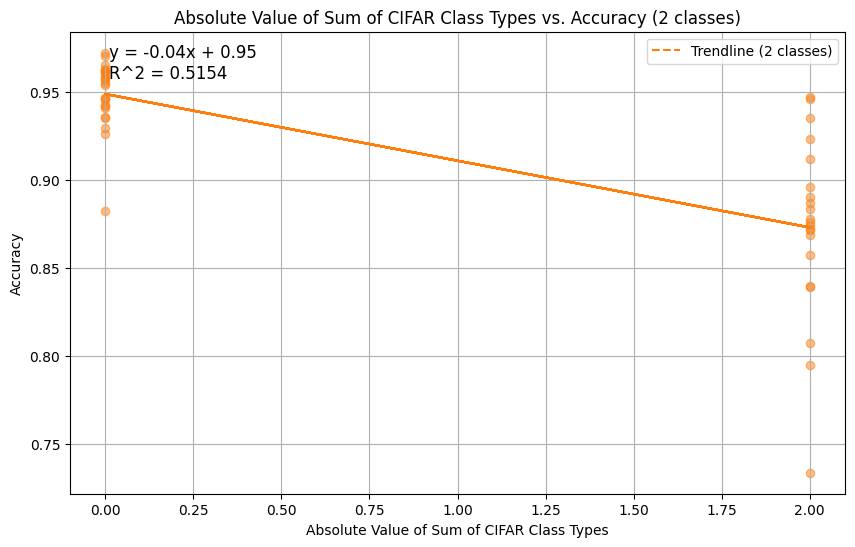

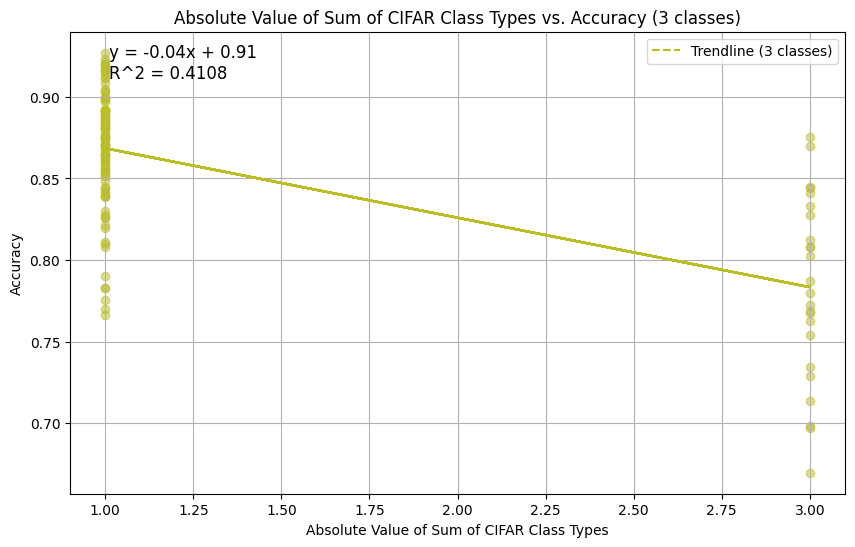

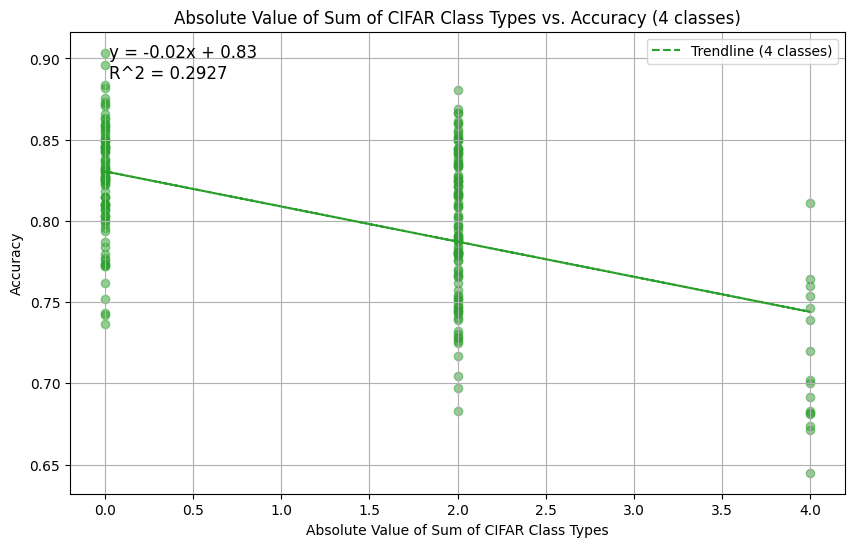

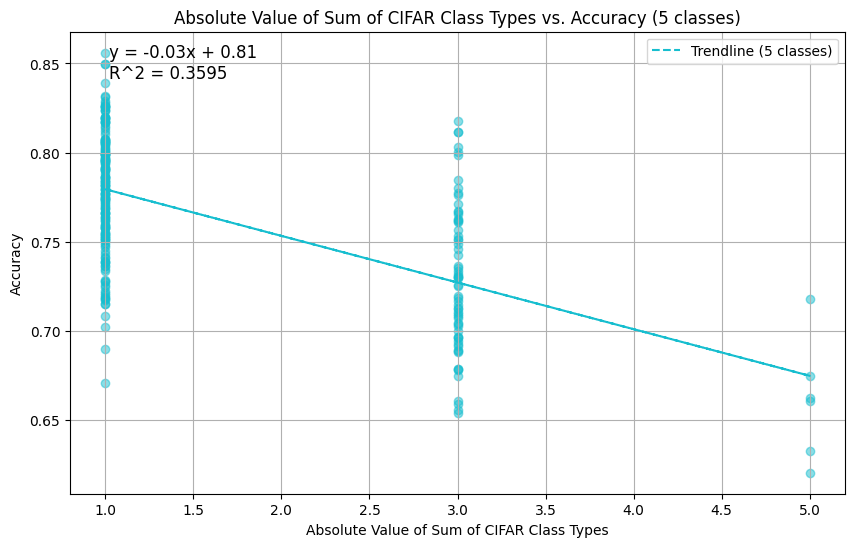

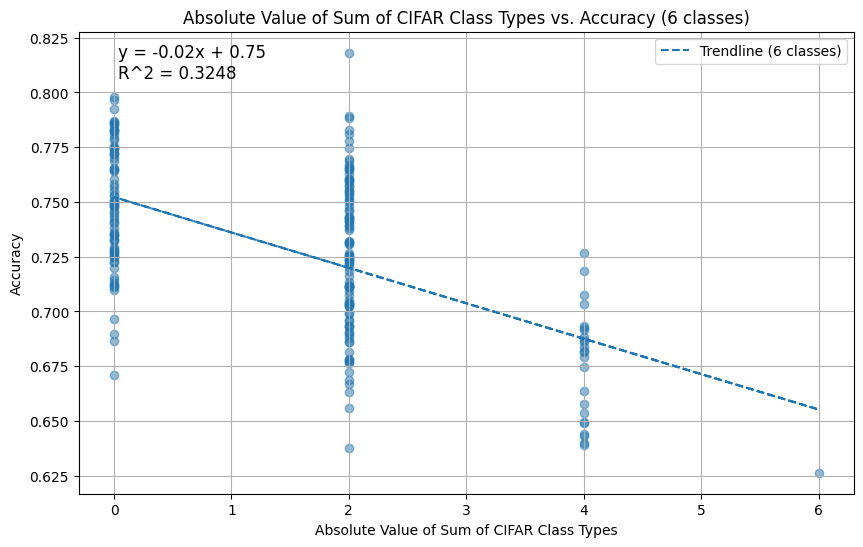

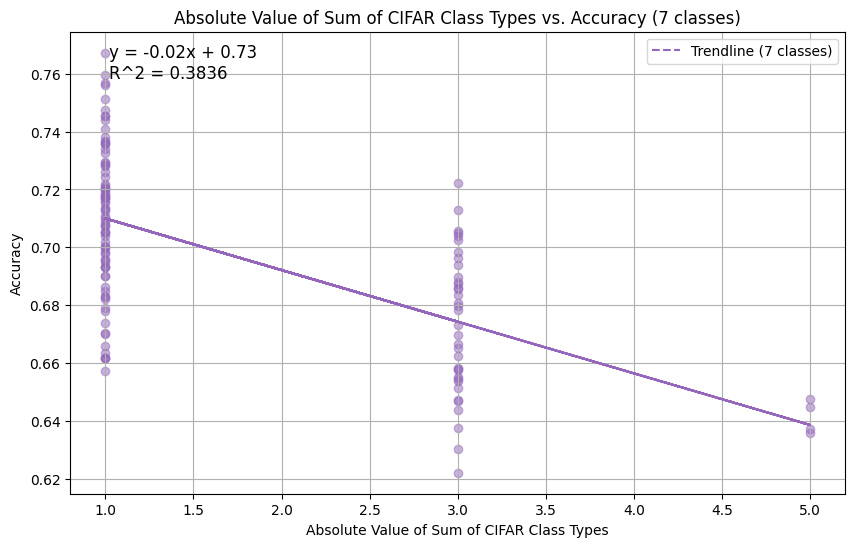

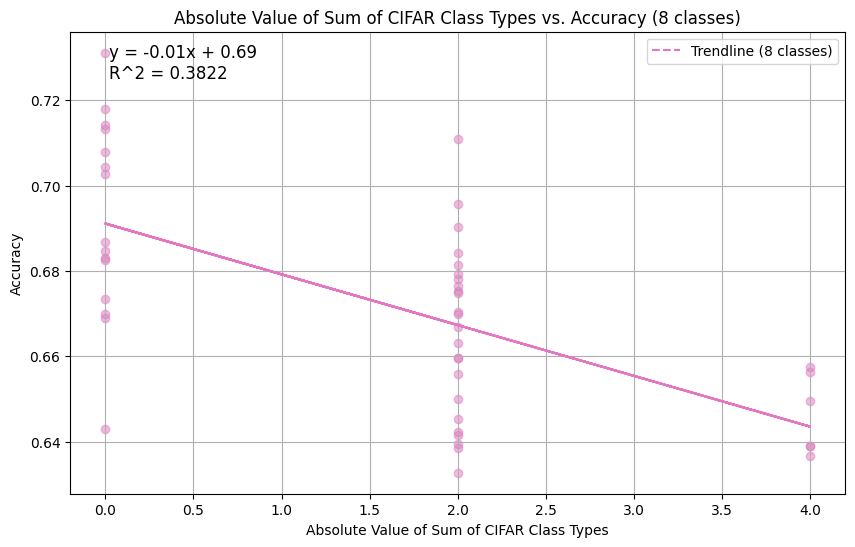

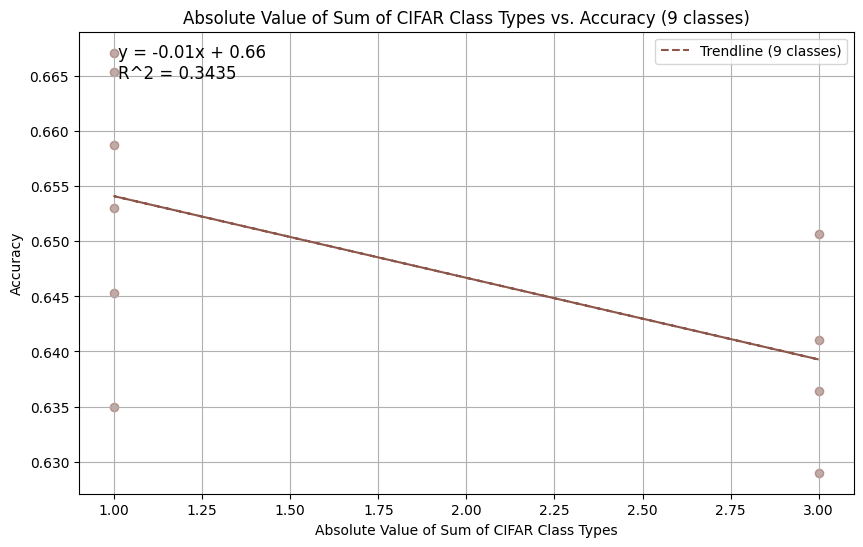

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


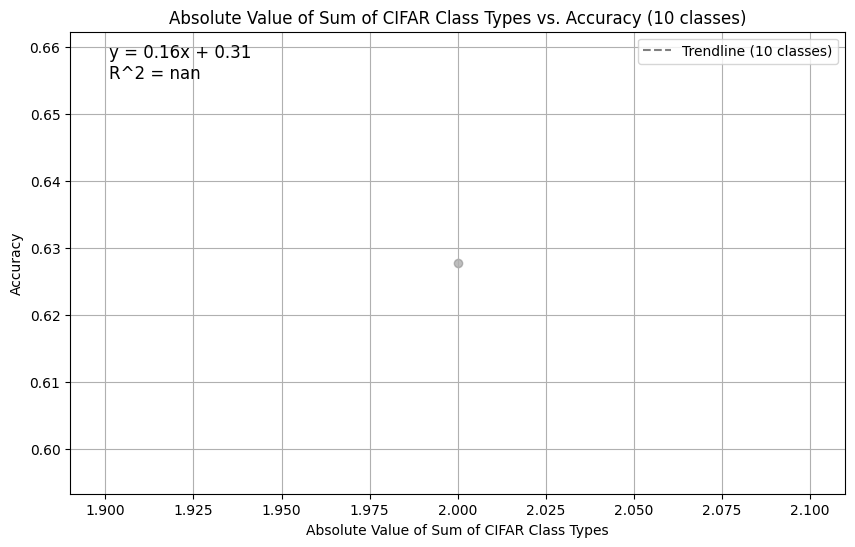

In [ ]:
#Displays the variety of class types on the x axis and the accuracy on the y axis for each num_classes. Make by GPT4
#Includes trendline
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

folder_path = "/content/drive/MyDrive/Neuro140/FinalProject/Experiment_7_Output_Data/"

cifar_class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
cifar_class_types = [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:brown', 'tab:gray']

# Read all Excel files and store the data in a dictionary
data_dict = defaultdict(list)
for file in os.listdir(folder_path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df_monosemanticity = pd.read_excel(file_path, sheet_name="Monosemanticity")
        df_accuracy = pd.read_excel(file_path, sheet_name="Accuracy")

        num_classes = file.count('_')

        selected_classes = [i for i, name in enumerate(cifar_class_names) if name in file.lower()]

        sum_class_types = sum(cifar_class_types[i] for i in selected_classes)
        accuracy = df_accuracy['Accuracy'].max()

        data_dict[num_classes].append({
            "abs_sum_class_types": abs(sum_class_types),
            "accuracy": accuracy
        })

# Plot the data
for num_classes, datasets in sorted(data_dict.items()):
    plt.figure(figsize=(10, 6))

    x_values = []
    y_values = []
    for dataset in datasets:
        abs_sum_class_types = dataset["abs_sum_class_types"]
        accuracy = dataset["accuracy"]

        x_values.append(abs_sum_class_types)
        y_values.append(accuracy)

        plt.scatter(abs_sum_class_types, accuracy, alpha=0.5, color=colors[num_classes - 1])

    # Add trendline, equation, and R^2 value
    z = np.polyfit(x_values, y_values, 1)
    p = np.poly1d(z)
    plt.plot(x_values, p(x_values), linestyle='--', color=colors[num_classes - 1], label=f'Trendline ({num_classes} classes)')

    equation = f'y = {z[0]:.2f}x + {z[1]:.2f}'
    r_squared = f'R^2 = {np.corrcoef(x_values, y_values)[0, 1] ** 2:.4f}'
    plt.annotate(f'{equation}\n{r_squared}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

    plt.xlabel('Absolute Value of Sum of CIFAR Class Types')
    plt.ylabel('Accuracy')
    plt.title(f'Absolute Value of Sum of CIFAR Class Types vs. Accuracy ({num_classes} classes)')
    plt.legend()
    plt.grid()
    plt.show()
